In [ ]:
!pip install tensorflow==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

<ipython-input-2-6954c0cac651>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
<ipython-input-2-6954c0cac651>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,


(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

<ipython-input-3-a6de281a0d94>:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  electricityDf.replace(['nan','?'], inplace=True)


In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.9, test_size=0.1, random_state=SEED, shuffle=False)
# val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)

(1296, 8)
(145, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1296, 1, 7) (1296,) (145, 1, 7) (145,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
saved_model = load_model('3_fold_model.60-0.01.h5', compile=False)

In [ ]:
from tensorflow import keras
saved_model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
saved_model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764


[0.005834975745528936, 0.07638701051473618]

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y_test = saved_model.predict(test_X)

5/5 [==============================] - 1s 4ms/step


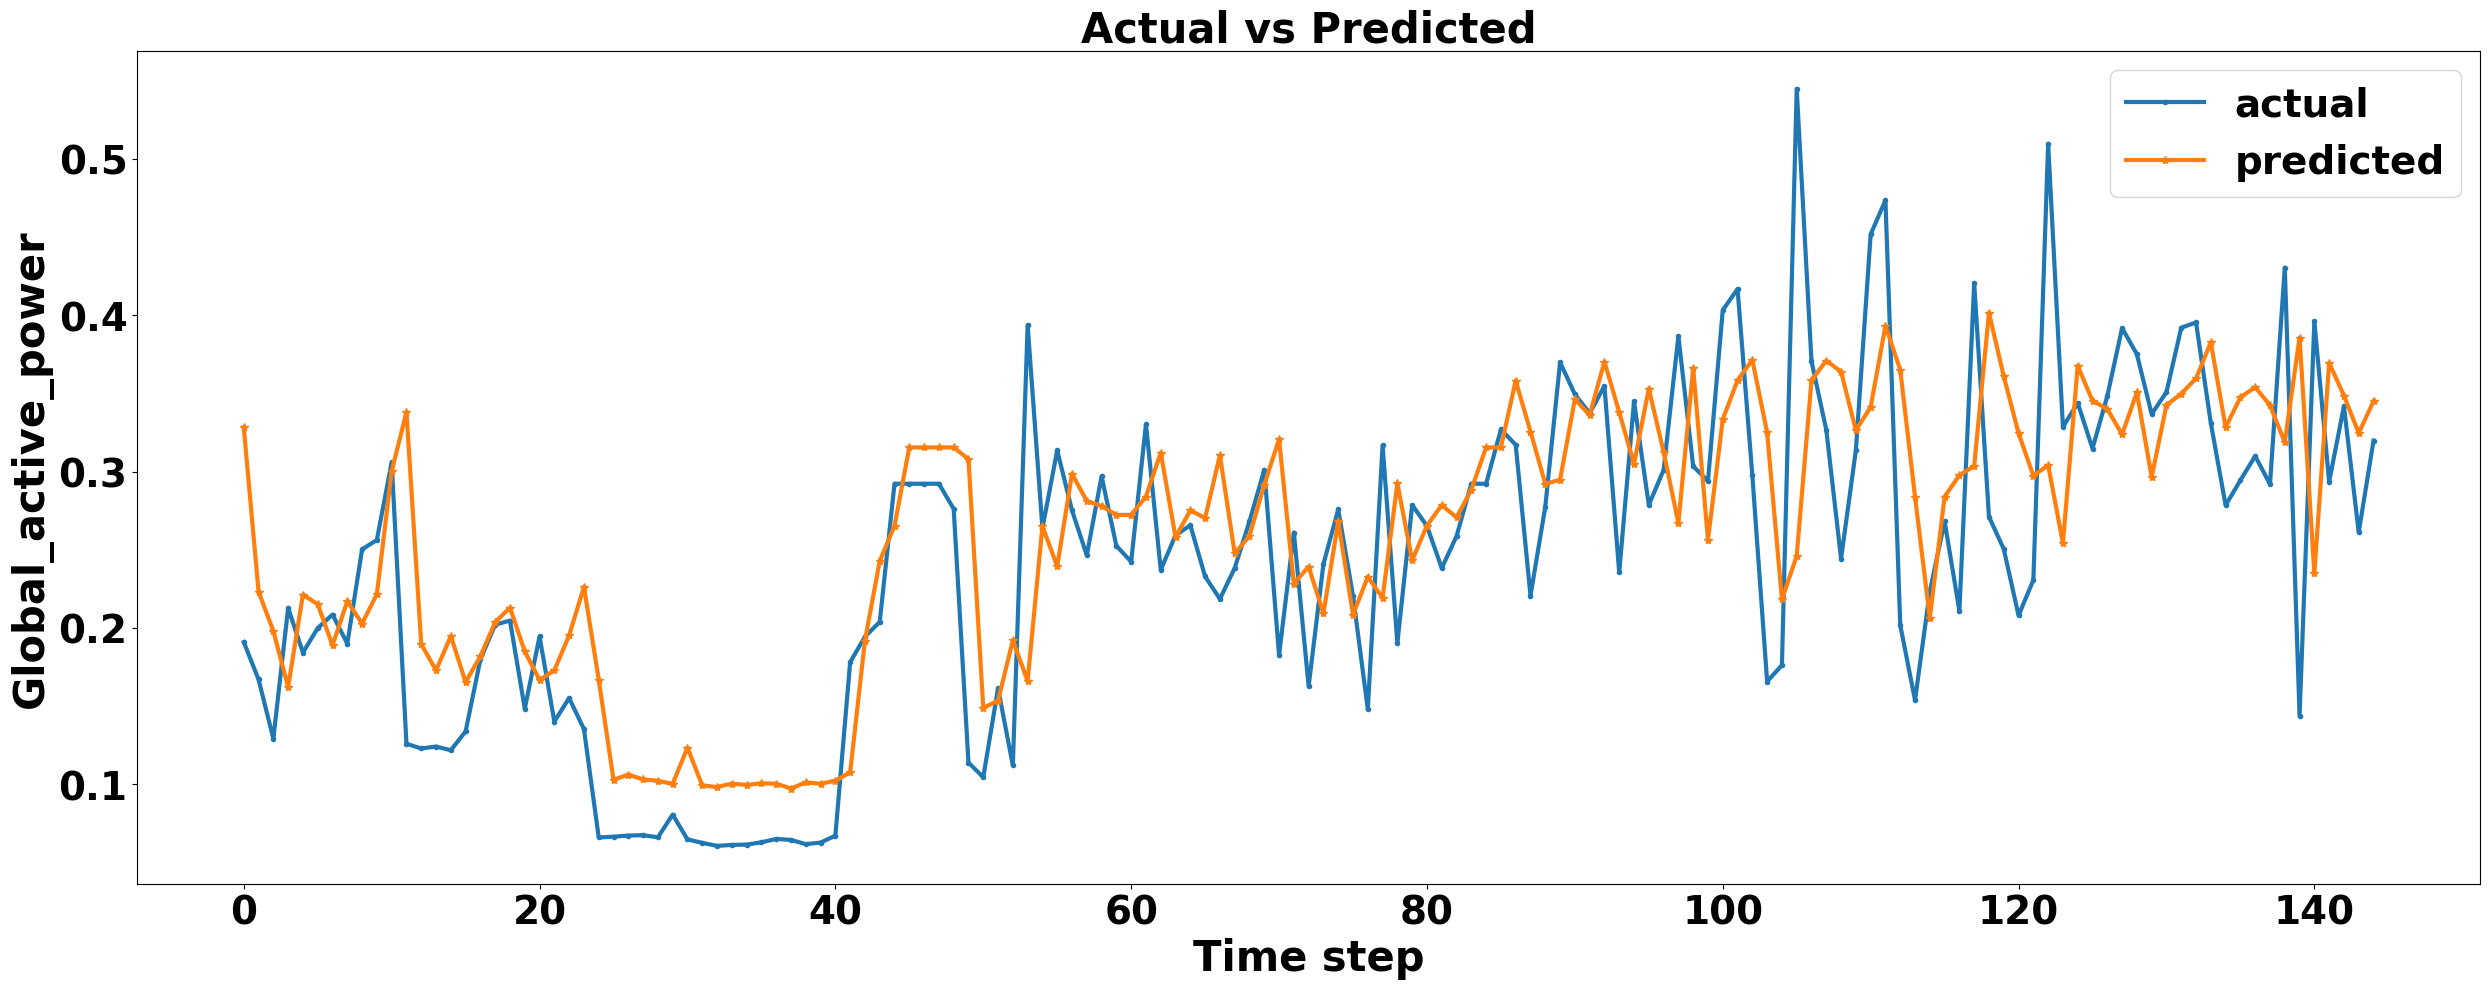

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power', fontsize=30, fontweight='bold')
plt.xlabel('Time step', fontsize=30, fontweight='bold')
plt.title("Actual vs Predicted", fontsize=30, fontweight='bold')
plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=28, fontweight='bold')
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual", linewidth=3)
plt.plot(range(len(pred_y_test)), pred_y_test[:], marker="*", label="predicted", linewidth=3)
plt.legend(prop={'size': 28, 'weight': 'bold'})

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('3-fold-best.pdf', format='pdf')
plt.show()

In [ ]:
def fgsm_attack(model, epsilon, data, label):
  import numpy as np
  import tensorflow as tf
  data = tf.convert_to_tensor(data)
  with tf.GradientTape() as tape:
    tape.watch(data)
    predictions = model(data)
    print("Predictions", predictions)
    loss = tf.keras.losses.MSE(label, predictions)
  gradient = tape.gradient(loss, data)
  print(gradient.shape)
  advX = data + (epsilon * np.sign(gradient))
  return advX

#### Epsilon = 0.05

In [ ]:
advX_1 = fgsm_attack(saved_model, 0.05, test_X, test_y)
advX_1

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

<tf.Tensor: shape=(145, 1, 7), dtype=float64, numpy=
array([[[ 0.33471478,  0.53848248,  0.6156305 , ...,  0.02692912,
          0.01639689,  0.18642841]],

       [[ 0.14095185,  0.50010251,  0.56751212, ...,  0.12522952,
          0.11912214,  0.300501  ]],

       [[ 0.11706197,  0.37590724,  0.5275739 , ...,  0.05      ,
          0.11367165,  0.36899354]],

       ...,

       [[ 0.34343625,  0.21199721,  0.63037729, ...,  0.11736556,
         -0.01217689,  0.23158539]],

       [[ 0.39179083,  0.09708326,  0.59706415, ...,  0.0480399 ,
          0.18519696,  0.43701848]],

       [[ 0.31107518,  0.1482707 ,  0.68914907, ...,  0.04625085,
         -0.01481956,  0.11851481]]])>

In [ ]:
test_pred_y_1 = saved_model.predict(advX_1)

5/5 [==============================] - 0s 3ms/step


In [ ]:
loss, rmse = saved_model.evaluate(advX_1, test_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.0137 - root_mean_squared_error: 0.1170


In [ ]:
rmse

0.11695908010005951

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse_1 = np.sqrt(mean_squared_error(test_y, test_pred_y_1))
print(rmse_1)

0.1169590806507685


In [ ]:
attack_rmse = []
attack_rmse.append(rmse_1)

In [ ]:
advX_1.shape

TensorShape([145, 1, 7])

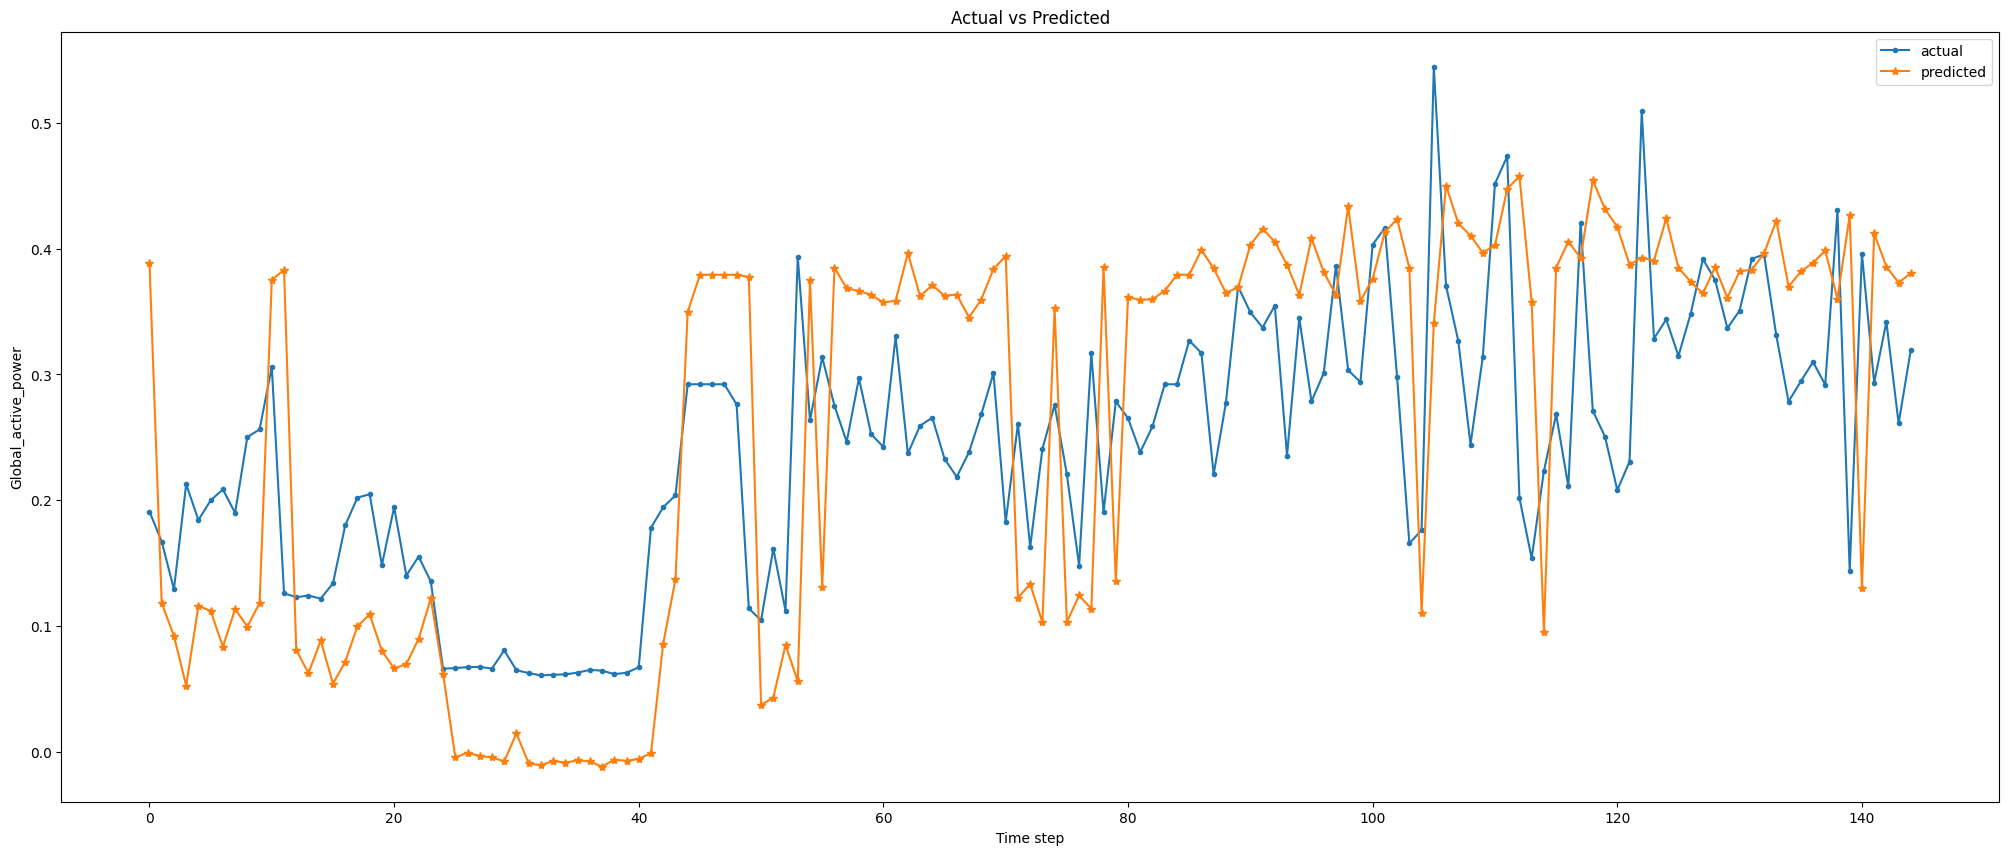

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(test_pred_y_1)), test_pred_y_1[:], marker="*", label="predicted")
plt.legend()
plt.show()

#### Epsilon = 0.1

In [ ]:
advX_2 = fgsm_attack(saved_model, 0.1, test_X, test_y)
advX_2

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

<tf.Tensor: shape=(145, 1, 7), dtype=float64, numpy=
array([[[ 0.38471478,  0.48848248,  0.6656305 , ..., -0.02307088,
         -0.03360311,  0.13642841]],

       [[ 0.09095185,  0.55010251,  0.51751212, ...,  0.17522952,
          0.16912214,  0.350501  ]],

       [[ 0.06706197,  0.42590724,  0.4775739 , ...,  0.1       ,
          0.16367165,  0.41899354]],

       ...,

       [[ 0.39343625,  0.26199721,  0.68037729, ...,  0.06736556,
         -0.06217689,  0.18158539]],

       [[ 0.44179083,  0.04708326,  0.64706415, ..., -0.0019601 ,
          0.13519696,  0.38701848]],

       [[ 0.36107518,  0.1982707 ,  0.73914907, ..., -0.00374915,
         -0.06481956,  0.06851481]]])>

In [ ]:
test_pred_y_2 = saved_model.predict(advX_2)

5/5 [==============================] - 0s 4ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse_2 = np.sqrt(mean_squared_error(test_y, test_pred_y_2))
print(rmse_2)

0.17410197375861952


In [ ]:
attack_rmse.append(rmse_2)

In [ ]:
advX_2.shape

TensorShape([145, 1, 7])

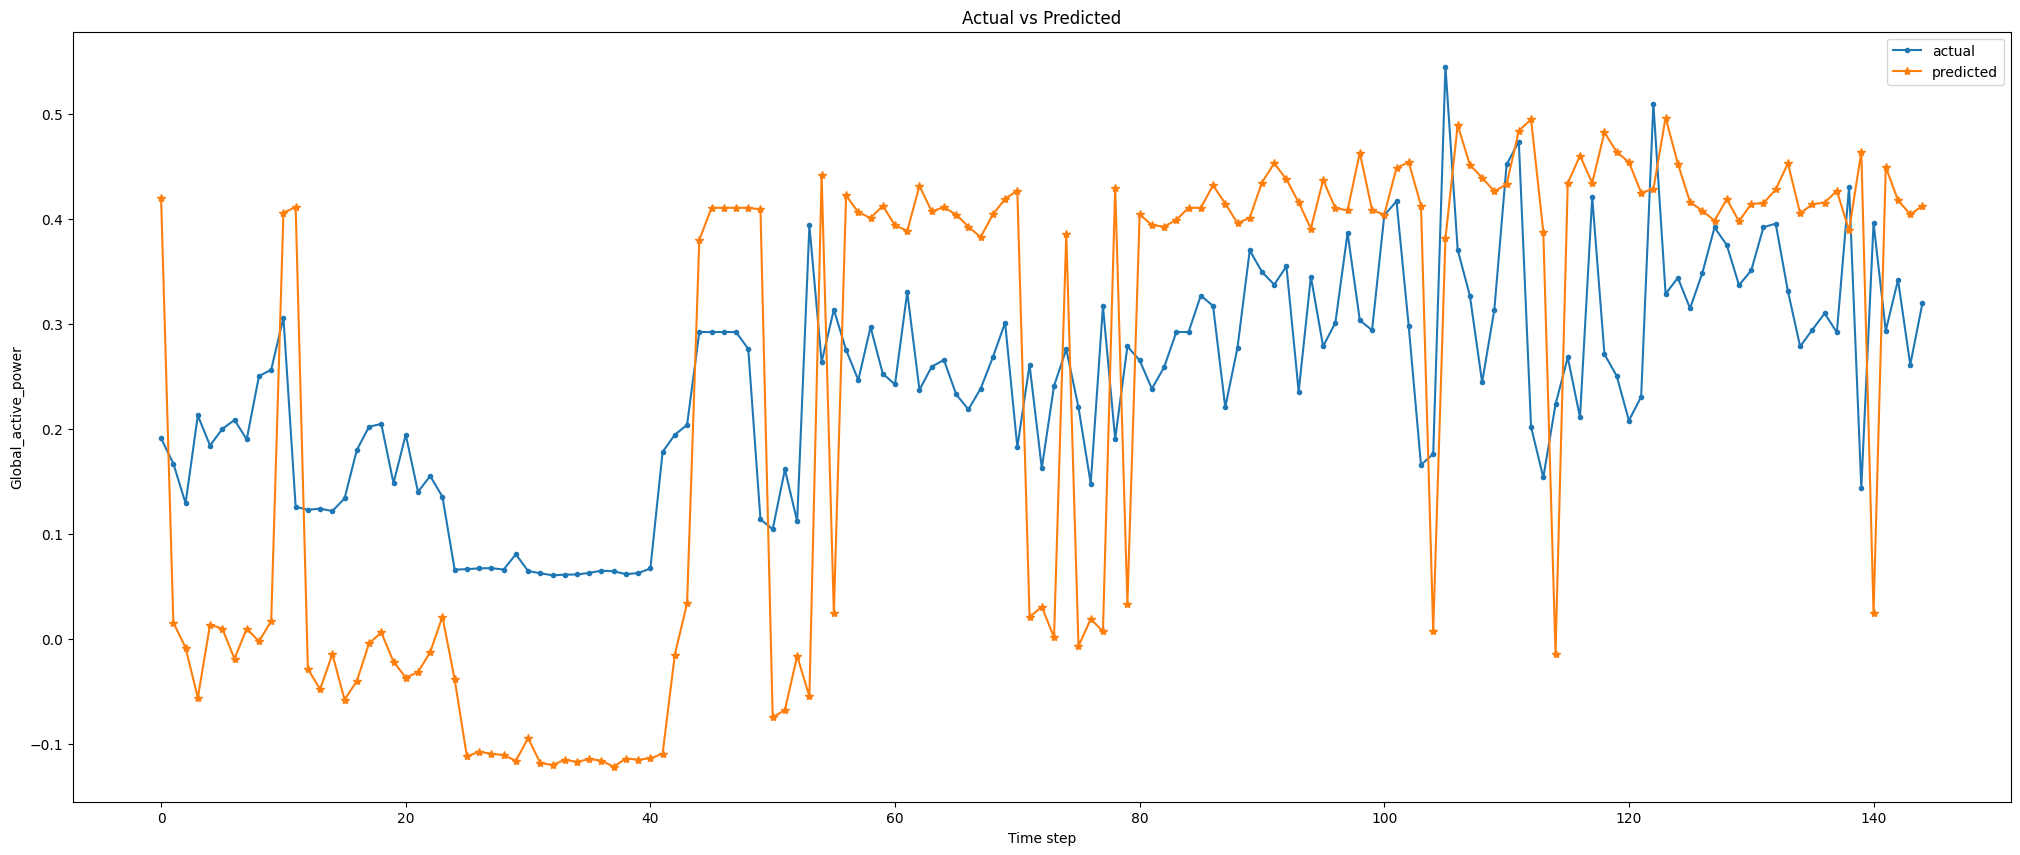

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(test_pred_y_2)), test_pred_y_2[:], marker="*", label="predicted")
plt.legend()
plt.show()

#### Epsilon = 0.15

In [ ]:
advX_3 = fgsm_attack(saved_model, 0.15, test_X, test_y)
advX_3

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

<tf.Tensor: shape=(145, 1, 7), dtype=float64, numpy=
array([[[ 0.43471478,  0.43848248,  0.7156305 , ..., -0.07307088,
         -0.08360311,  0.08642841]],

       [[ 0.04095185,  0.60010251,  0.46751212, ...,  0.22522952,
          0.21912214,  0.400501  ]],

       [[ 0.01706197,  0.47590724,  0.4275739 , ...,  0.15      ,
          0.21367165,  0.46899354]],

       ...,

       [[ 0.44343625,  0.31199721,  0.73037729, ...,  0.01736556,
         -0.11217689,  0.13158539]],

       [[ 0.49179083, -0.00291674,  0.69706415, ..., -0.0519601 ,
          0.08519696,  0.33701848]],

       [[ 0.41107518,  0.2482707 ,  0.78914907, ..., -0.05374915,
         -0.11481956,  0.01851481]]])>

In [ ]:
test_pred_y_3 = saved_model.predict(advX_3)

5/5 [==============================] - 0s 4ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse_3 = np.sqrt(mean_squared_error(test_y, test_pred_y_3))
print(rmse_3)

0.2369795357611655


In [ ]:
attack_rmse.append(rmse_3)

In [ ]:
advX_3.shape

TensorShape([145, 1, 7])

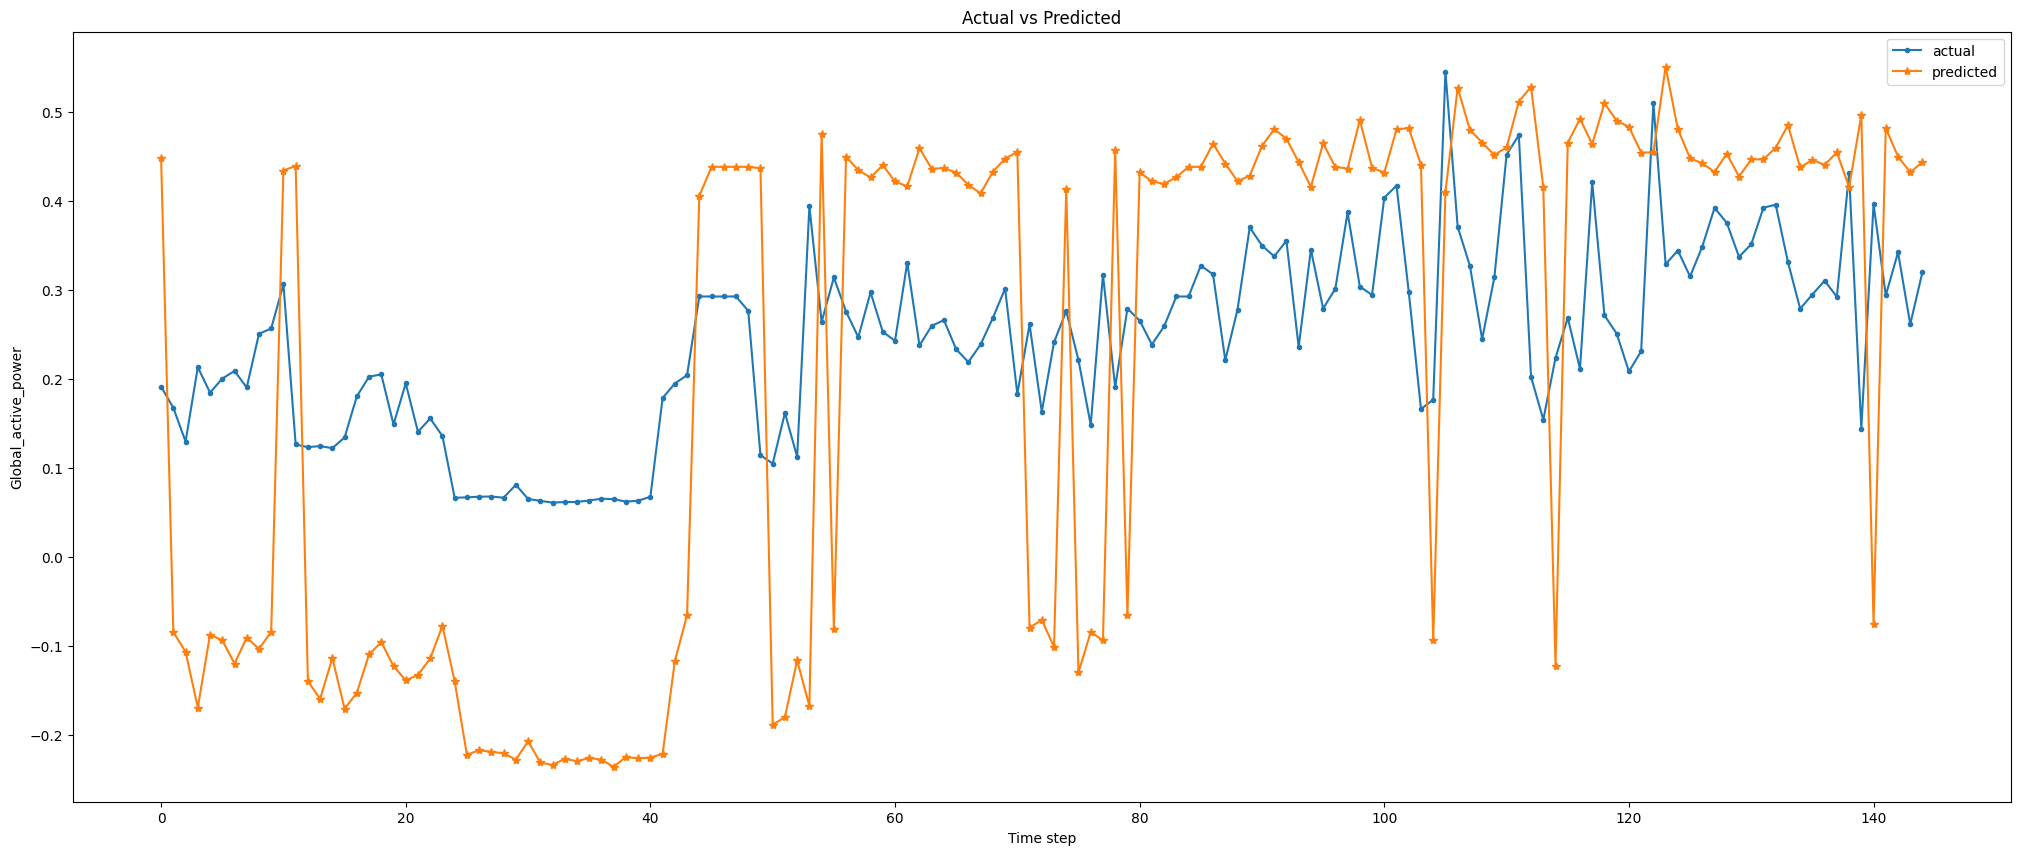

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(test_pred_y_3)), test_pred_y_3[:], marker="*", label="predicted")
plt.legend()
plt.show()

#### Epsilon = 0.2

In [ ]:
advX_4 = fgsm_attack(saved_model, 0.2, test_X, test_y)
advX_4

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

<tf.Tensor: shape=(145, 1, 7), dtype=float64, numpy=
array([[[ 0.48471478,  0.38848248,  0.7656305 , ..., -0.12307088,
         -0.13360311,  0.03642841]],

       [[-0.00904815,  0.65010251,  0.41751212, ...,  0.27522952,
          0.26912214,  0.450501  ]],

       [[-0.03293803,  0.52590724,  0.3775739 , ...,  0.2       ,
          0.26367165,  0.51899354]],

       ...,

       [[ 0.49343625,  0.36199721,  0.78037729, ..., -0.03263444,
         -0.16217689,  0.08158539]],

       [[ 0.54179083, -0.05291674,  0.74706415, ..., -0.1019601 ,
          0.03519696,  0.28701848]],

       [[ 0.46107518,  0.2982707 ,  0.83914907, ..., -0.10374915,
         -0.16481956, -0.03148519]]])>

In [ ]:
test_pred_y_4 = saved_model.predict(advX_4)

5/5 [==============================] - 0s 9ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse_4 = np.sqrt(mean_squared_error(test_y, test_pred_y_4))
print(rmse_4)

0.3039277083231838


In [ ]:
attack_rmse.append(rmse_4)

In [ ]:
advX_4.shape

TensorShape([145, 1, 7])

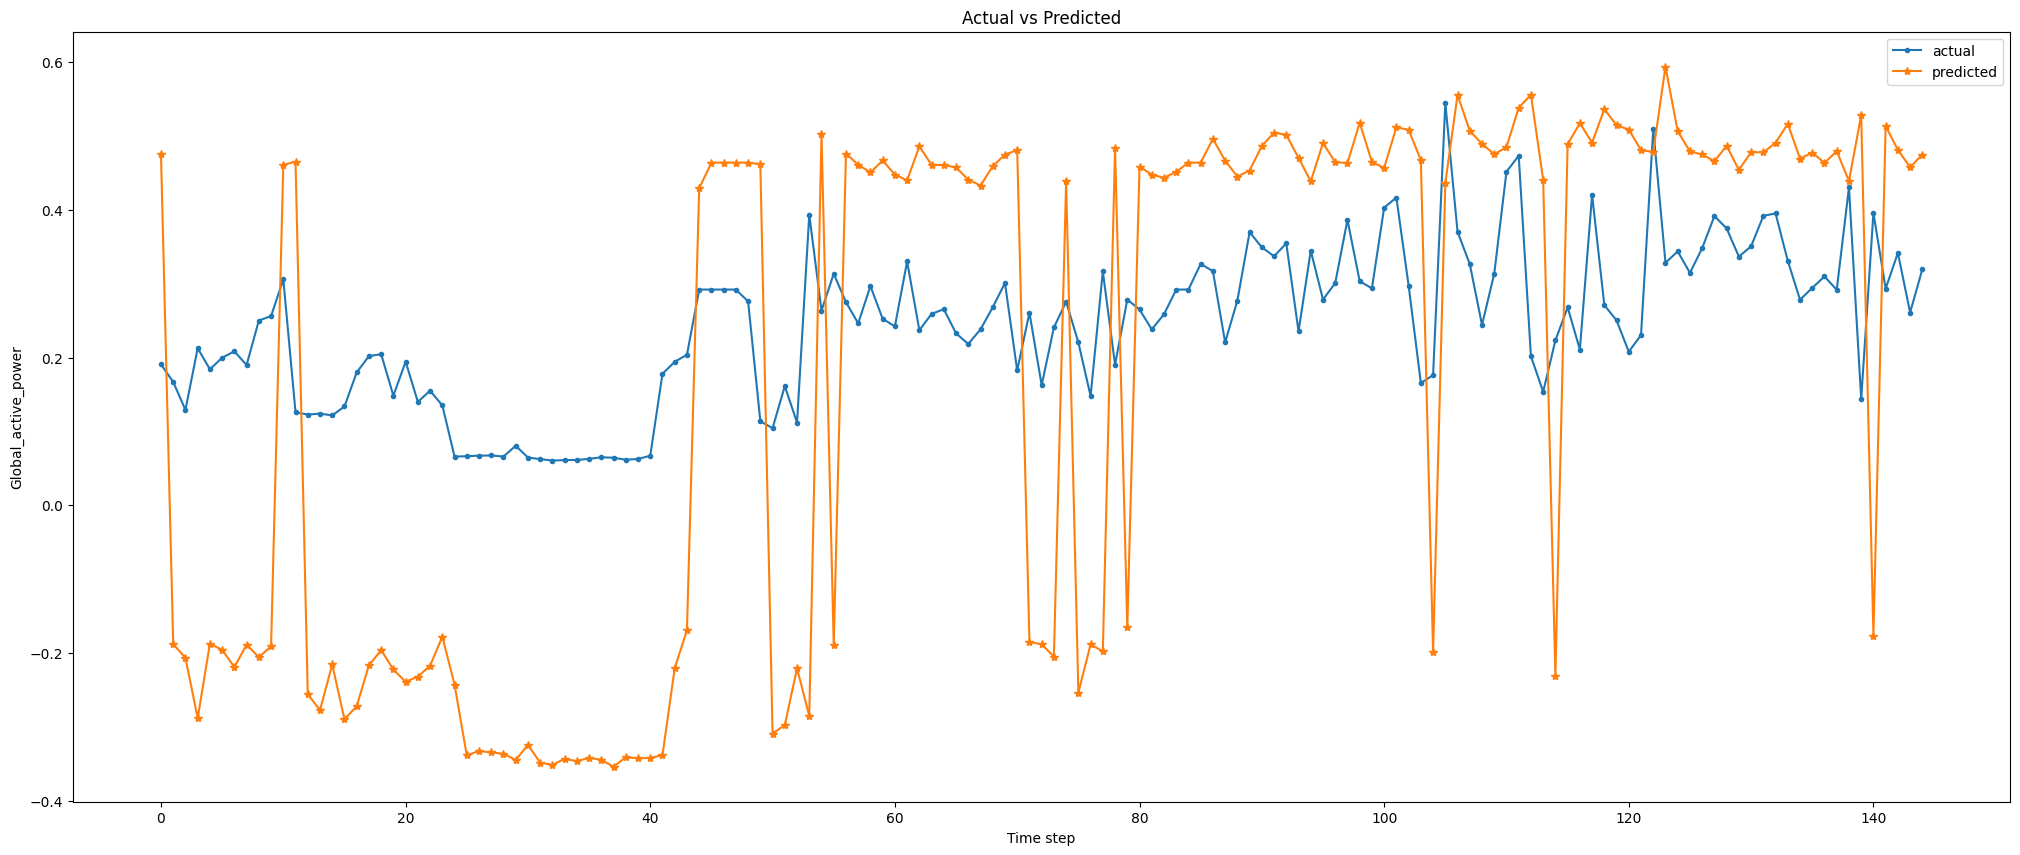

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(test_pred_y_4)), test_pred_y_4[:], marker="*", label="predicted")
plt.legend()
plt.show()

#### Epsilon = 0.25

In [ ]:
advX_5 = fgsm_attack(saved_model, 0.25, test_X, test_y)
advX_5

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

<tf.Tensor: shape=(145, 1, 7), dtype=float64, numpy=
array([[[ 0.53471478,  0.33848248,  0.8156305 , ..., -0.17307088,
         -0.18360311, -0.01357159]],

       [[-0.05904815,  0.70010251,  0.36751212, ...,  0.32522952,
          0.31912214,  0.500501  ]],

       [[-0.08293803,  0.57590724,  0.3275739 , ...,  0.25      ,
          0.31367165,  0.56899354]],

       ...,

       [[ 0.54343625,  0.41199721,  0.83037729, ..., -0.08263444,
         -0.21217689,  0.03158539]],

       [[ 0.59179083, -0.10291674,  0.79706415, ..., -0.1519601 ,
         -0.01480304,  0.23701848]],

       [[ 0.51107518,  0.3482707 ,  0.88914907, ..., -0.15374915,
         -0.21481956, -0.08148519]]])>

In [ ]:
test_pred_y_5 = saved_model.predict(advX_5)

5/5 [==============================] - 0s 5ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse_5= np.sqrt(mean_squared_error(test_y, test_pred_y_5))
print(rmse_5)

0.37455667524323827


In [ ]:
saved_model.evaluate(advX_5, test_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.1403 - root_mean_squared_error: 0.3746


[0.1402927041053772, 0.37455669045448303]

In [ ]:
attack_rmse.append(rmse_5)

In [ ]:
advX_5.shape

TensorShape([145, 1, 7])

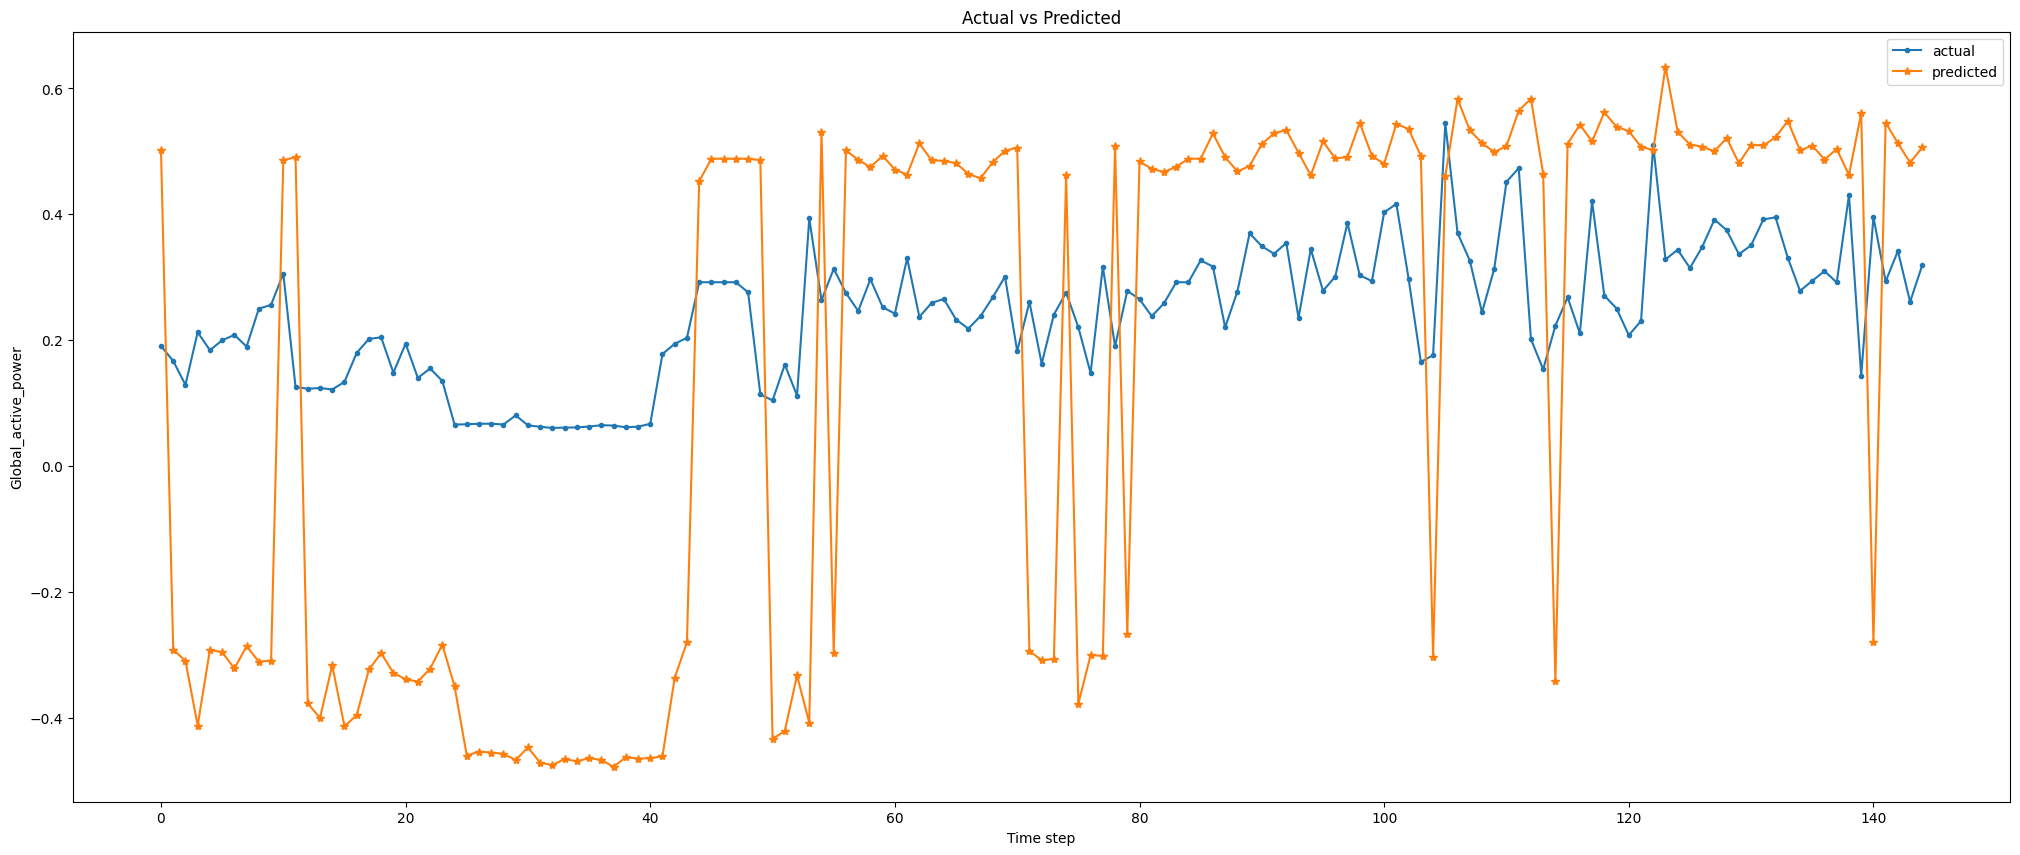

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(test_pred_y_5)), test_pred_y_5[:], marker="*", label="predicted")
plt.legend()
plt.show()

In [ ]:
attack_rmse

[0.1169590806507685,
 0.17410197375861952,
 0.2369795357611655,
 0.3039277083231838,
 0.37455667524323827]

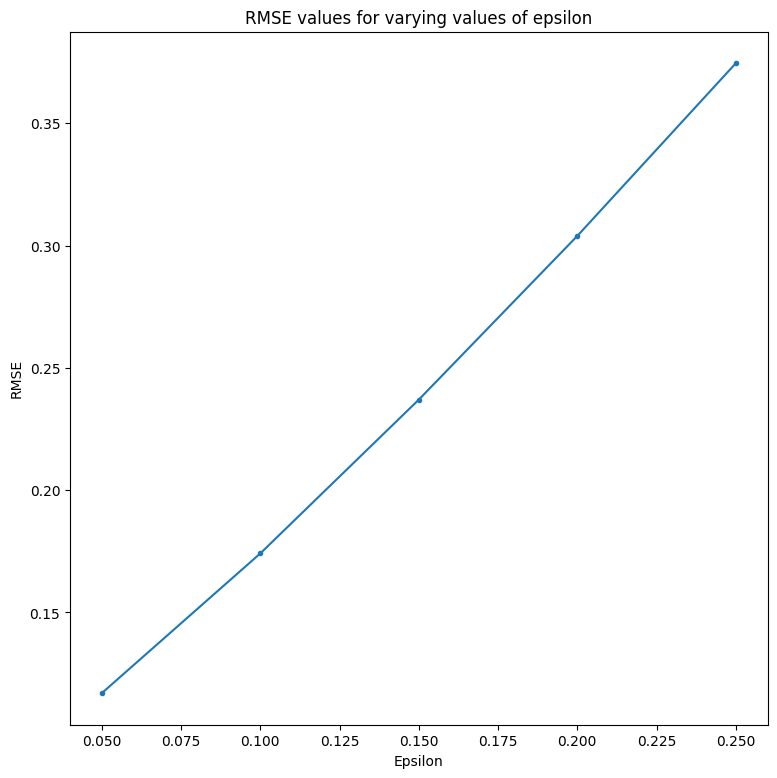

In [ ]:
epsilon_x_axis = [0.05, 0.1, 0.15, 0.2, 0.25]
plt.figure(figsize=(9, 9))
plt.ylabel('RMSE')
plt.xlabel('Epsilon')
plt.title("RMSE values for varying values of epsilon")
plt.plot(epsilon_x_axis, attack_rmse, marker=".",)
plt.show()

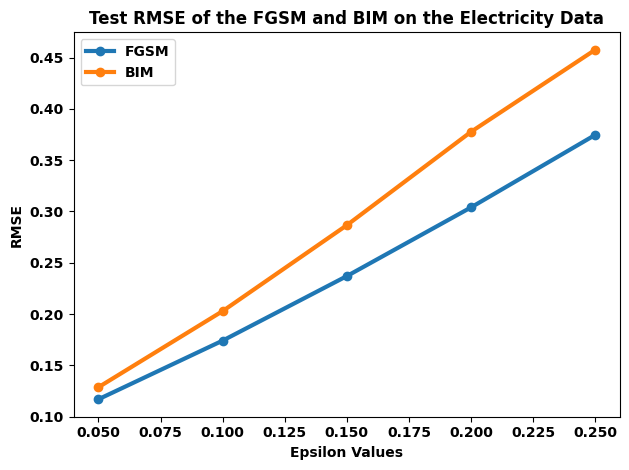

In [ ]:
import matplotlib.pyplot as plt

epsilon = [0.05, 0.1, 0.15, 0.2, 0.25]
fgsm = [0.1169590806507685, 0.17410197375861952, 0.2369795357611655, 0.3039277083231838, 0.37455667524323827]
bim = [0.12870213749904388, 0.20285986409033158, 0.286586059790032, 0.3775873014875793, 0.45753165098742504]

# Plotting
plt.plot(epsilon, fgsm, marker='o', label='FGSM', linewidth=3)
plt.plot(epsilon, bim, marker='o', label='BIM', linewidth=3)

# Adding labels and title
plt.xlabel('Epsilon Values', fontweight='bold')
plt.ylabel('RMSE', fontweight='bold')
plt.title('Test RMSE of the FGSM and BIM on the Electricity Data', fontweight='bold')

# Setting font size and weight
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Adding legend
plt.legend(prop={'weight': 'bold'})

# Save and display the plot
plt.tight_layout()
plt.savefig('elec-attack.pdf', format='pdf')
plt.show()

## Imperceptibility of attack - Highest order of epsilon vs. train data distribution

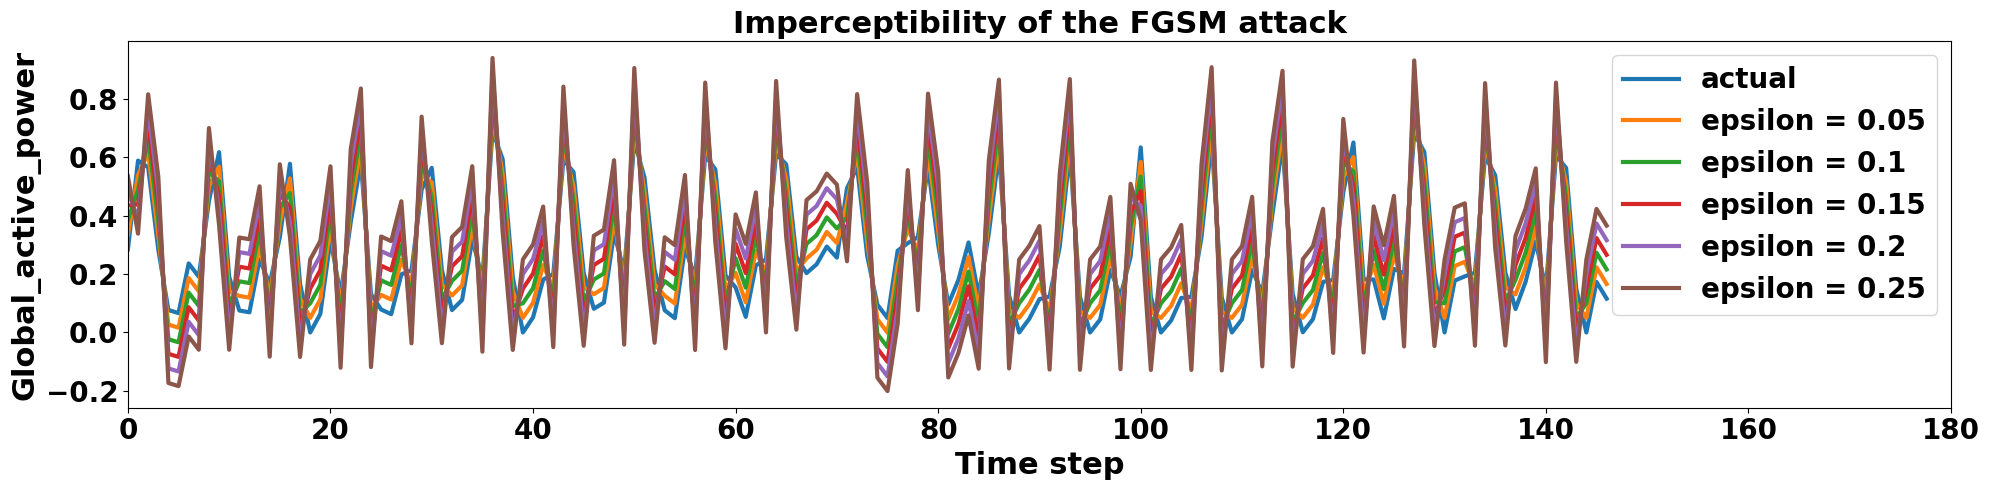

In [ ]:
fig = plt.figure()

actual = np.concatenate(test_X[0: 21]).ravel()
adversarial1 = np.concatenate(advX_1[0: 21]).ravel()
adversarial2 = np.concatenate(advX_2[0: 21]).ravel()
adversarial3 = np.concatenate(advX_3[0: 21]).ravel()
adversarial4 = np.concatenate(advX_4[0: 21]).ravel()
adversarial5 = np.concatenate(advX_5[0: 21]).ravel()

plt.ylabel('Global_active_power', fontsize=22, fontweight='bold')
plt.xlabel('Time step', fontsize=22, fontweight='bold')
plt.title("Imperceptibility of the FGSM attack", fontsize=22, fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.xlim(0, 180)

xc  = range(len(actual))
plt.plot(xc, actual, label='actual', linewidth=3)
plt.plot(xc, adversarial1, label='epsilon = 0.05', linewidth=3)
plt.plot(xc, adversarial2, label='epsilon = 0.1', linewidth=3)
plt.plot(xc, adversarial3, label='epsilon = 0.15', linewidth=3)
plt.plot(xc, adversarial4, label='epsilon = 0.2', linewidth=3)
plt.plot(xc, adversarial5, label='epsilon = 0.25', linewidth=3)

fig.set_size_inches(20, 5)
plt.legend(prop={'size':20, 'weight': 'bold'})

plt.tight_layout()
plt.savefig('elec-fgsm-imperceptible.pdf', format='pdf')
plt.show()

### One graph to visualize the attacks with varying epsilon values

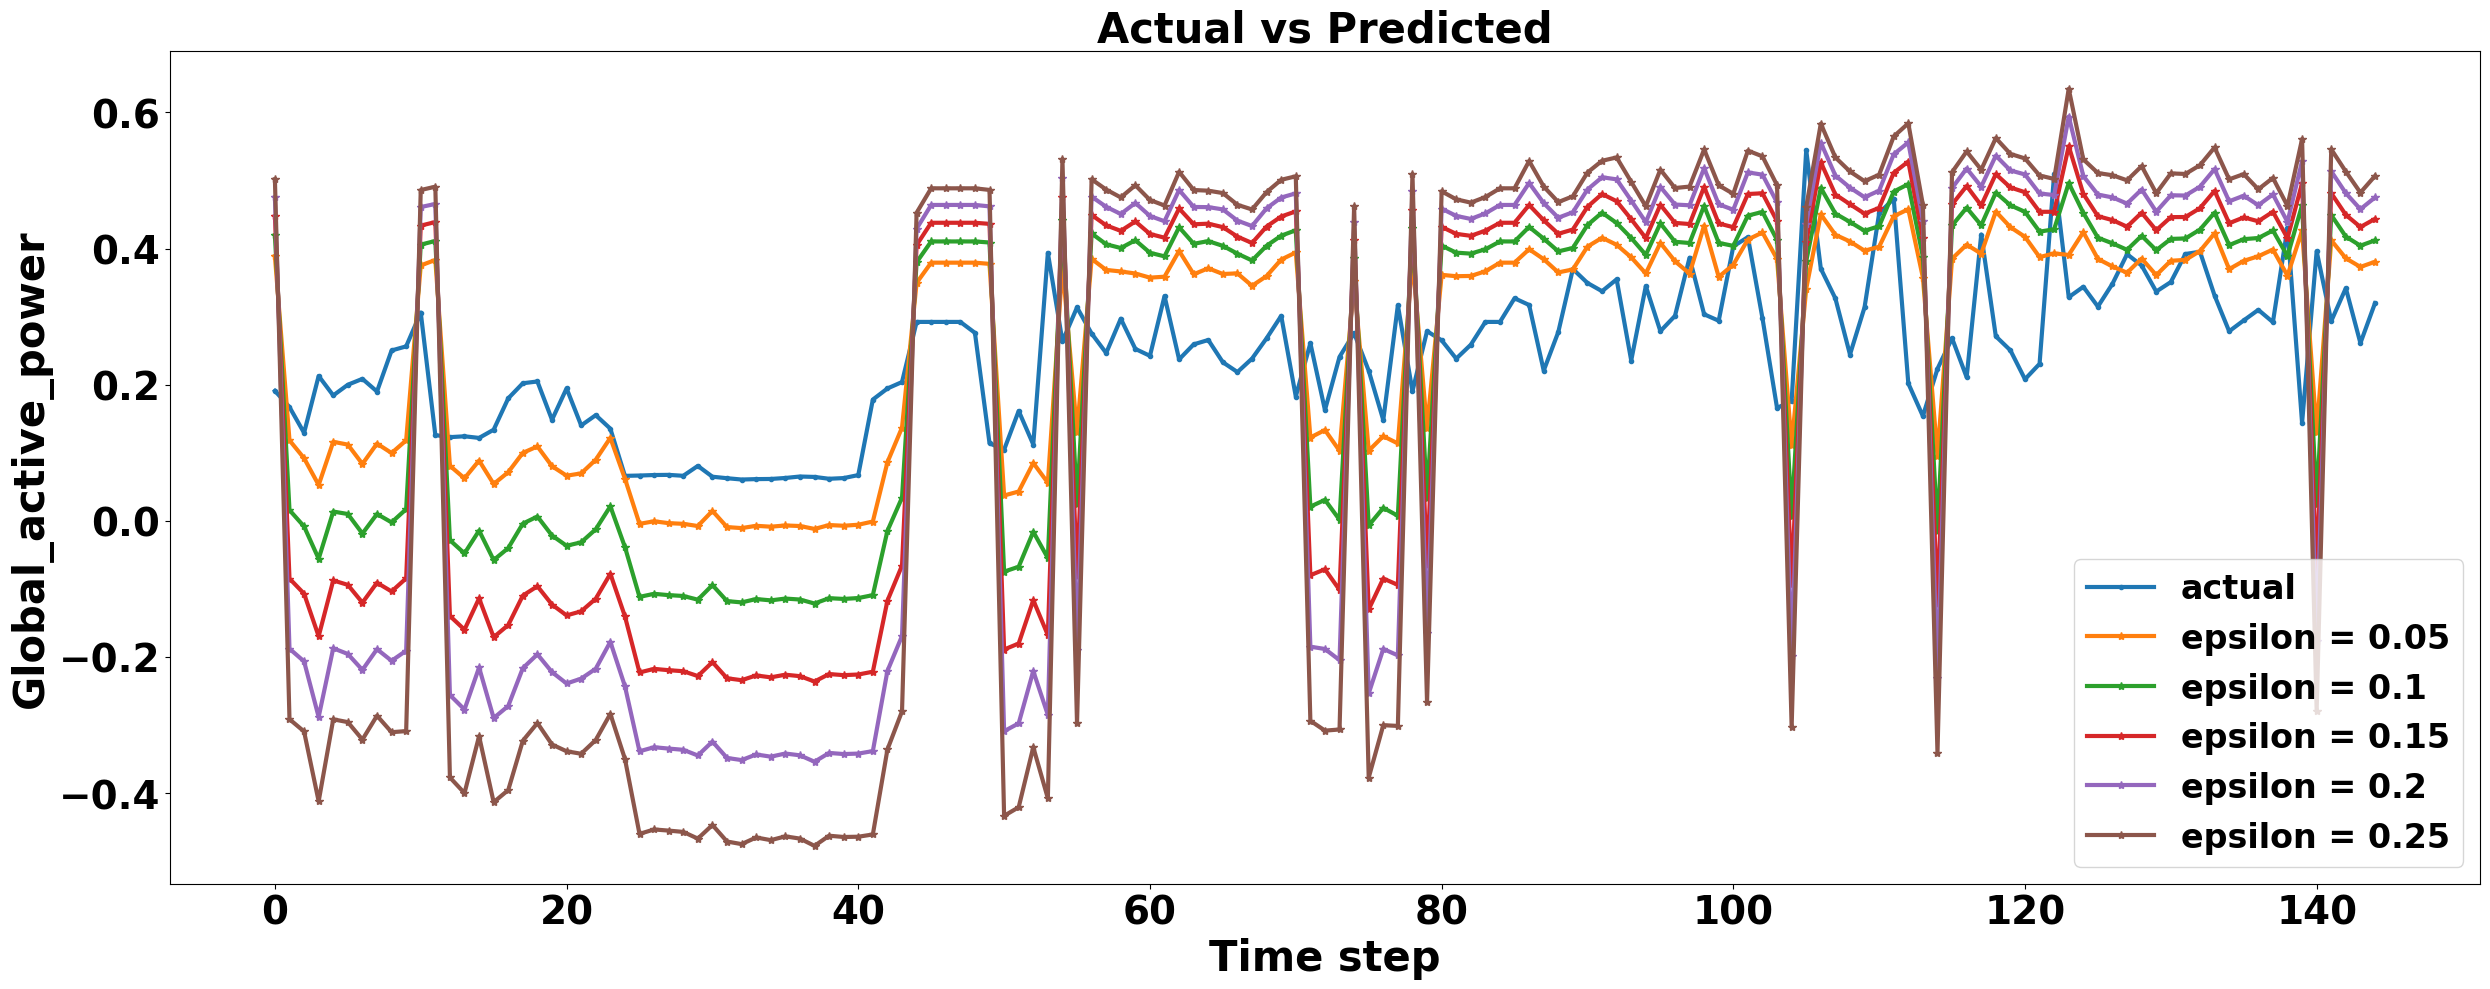

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power', fontsize=30, fontweight='bold')
plt.xlabel('Time step', fontsize=30, fontweight='bold')
plt.title("Actual vs Predicted", fontsize=30, fontweight='bold')

plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=28, fontweight='bold')

plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual", linewidth=3)
plt.plot(range(len(test_pred_y_1)), test_pred_y_1[:], marker="*", label="epsilon = 0.05", linewidth=3)
plt.plot(range(len(test_pred_y_2)), test_pred_y_2[:], marker="*", label="epsilon = 0.1", linewidth=3)
plt.plot(range(len(test_pred_y_3)), test_pred_y_3[:], marker="*", label="epsilon = 0.15", linewidth=3)
plt.plot(range(len(test_pred_y_4)), test_pred_y_4[:], marker="*", label="epsilon = 0.2", linewidth=3)
plt.plot(range(len(test_pred_y_5)), test_pred_y_5[:], marker="*", label="epsilon = 0.25", linewidth=3)

plt.legend(prop={'size':24, 'weight': 'bold'})

plt.tight_layout()
plt.savefig('elec-fgsm-curve.pdf', format='pdf')
plt.show()

# Adversarial Training

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.9, test_size=0.1, random_state=SEED, shuffle=False)
# val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)

(1296, 8)
(145, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1296, 1, 7) (1296,) (145, 1, 7) (145,)


### Augment the training set with poisoned data


In [ ]:
import tensorflow as tf
import keras
from keras.models import load_model
saved_model = load_model('3_fold_model.60-0.01.h5')

In [ ]:
saved_model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
def fgsm_attack(model, epsilon, data, label):
  import numpy as np
  import tensorflow as tf
  data = tf.convert_to_tensor(data)
  with tf.GradientTape() as tape:
    tape.watch(data)
    predictions = model(data)
    print("Predictions", predictions)
    loss = tf.keras.losses.MSE(label, predictions)
  gradient = tape.gradient(loss, data)
  print(gradient.shape)
  advX = data + (epsilon * np.sign(gradient))
  return advX

In [ ]:
train_X_tensor = tf.convert_to_tensor(train_X)
advX_6 = fgsm_attack(saved_model, 0.05, train_X, train_y)
advX_7 = fgsm_attack(saved_model, 0.1, train_X, train_y)
advX_8 = fgsm_attack(saved_model, 0.15, train_X, train_y)
advX_9 = fgsm_attack(saved_model, 0.2, train_X, train_y)
advX_10 = fgsm_attack(saved_model, 0.25, train_X, train_y)

train_dataset_X = tf.concat([train_X_tensor, advX_6, advX_7, advX_8, advX_9, advX_10], axis=0)
print(train_dataset_X.shape)
train_y_tensor = tf.convert_to_tensor(train_y)
train_dataset_y = tf.concat([train_y_tensor, train_y_tensor, train_y_tensor, train_y_tensor, train_y_tensor, train_y_tensor], axis=0)
print(train_dataset_y.shape)

Predictions tf.Tensor(
[[0.49125355]
 [0.4869366 ]
 [0.38792998]
 ...
 [0.2646915 ]
 [0.2138117 ]
 [0.21255153]], shape=(1296, 1), dtype=float32)
(1296, 1, 7)
Predictions tf.Tensor(
[[0.49125355]
 [0.4869366 ]
 [0.38792998]
 ...
 [0.2646915 ]
 [0.2138117 ]
 [0.21255153]], shape=(1296, 1), dtype=float32)
(1296, 1, 7)
Predictions tf.Tensor(
[[0.49125355]
 [0.4869366 ]
 [0.38792998]
 ...
 [0.2646915 ]
 [0.2138117 ]
 [0.21255153]], shape=(1296, 1), dtype=float32)
(1296, 1, 7)
Predictions tf.Tensor(
[[0.49125355]
 [0.4869366 ]
 [0.38792998]
 ...
 [0.2646915 ]
 [0.2138117 ]
 [0.21255153]], shape=(1296, 1), dtype=float32)
(1296, 1, 7)
Predictions tf.Tensor(
[[0.49125355]
 [0.4869366 ]
 [0.38792998]
 ...
 [0.2646915 ]
 [0.2138117 ]
 [0.21255153]], shape=(1296, 1), dtype=float32)
(1296, 1, 7)
(7776, 1, 7)
(7776,)


### Define the LSTM model architecture


In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43301 (169.14 KB)
Trainable params: 43301 (169.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
Fold 0:
  Train: index=[   0    1    2 ... 1941 1942 1943]
  Test:  index=[1944 1945 1946 ... 3885 3886 3887]
Epoch 1/100
61/61 - 3s - loss: 0.0408 - root_mean_squared_error: 0.2021 - val_loss: 0.0154 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 - 0s - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088 - 376ms/epoch - 6ms/step
Epoch 3/100
61/61 - 1s - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112 - 515ms/epoch - 8ms/step
Epoch 4/100
61/61 - 1s - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1295 - 505ms/epoch - 8ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0113 - root_mean_squared_error: 0.1065 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392 - 370ms/epoch - 6ms/step
Epoch 6/100
61/61 - 1s - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1463 - 502ms/epoch - 8ms/step
Epoch 7/100
61/61 - 1s - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521 - 604ms/epoch - 10ms/step
Epoch 8/100
61/61 - 1s - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0

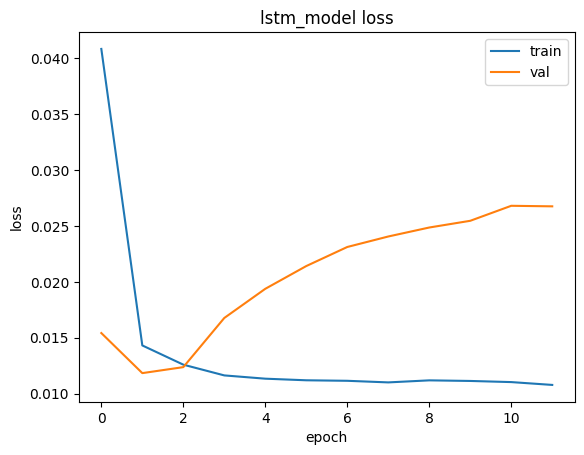

Fold 1:
  Train: index=[   0    1    2 ... 3885 3886 3887]
  Test:  index=[3888 3889 3890 ... 5829 5830 5831]
Epoch 1/100
122/122 - 1s - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296 - 844ms/epoch - 7ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 - 1s - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233 - 891ms/epoch - 7ms/step
Epoch 3/100
122/122 - 1s - loss: 0.0103 - root_mean_squared_error: 0.1017 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1256 - 907ms/epoch - 7ms/step
Epoch 4/100
122/122 - 1s - loss: 0.0103 - root_mean_squared_error: 0.1014 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250 - 732ms/epoch - 6ms/step
Epoch 5/100
122/122 - 1s - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1266 - 1s/epoch - 8ms/step
Epoch 6/100
122/122 - 1s - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244 - 938ms/epoch - 8ms/step
Epoch 7/100
122/122 - 1s - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218 - 1s/epoch - 9ms/step
Epoch 8/100
122/122 - 1s - loss: 0.0101 - root_mean_squared_error: 0.1007 - val_lo

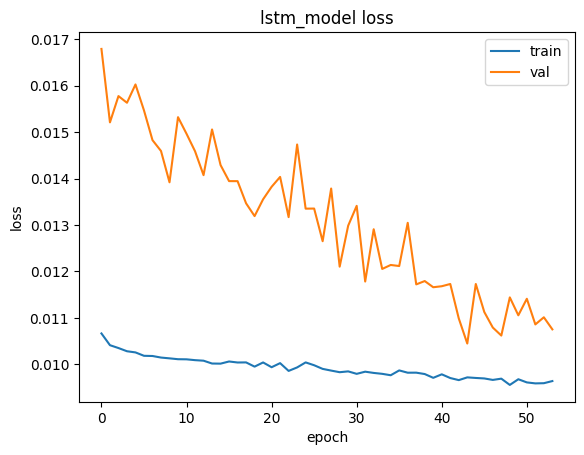

Fold 2:
  Train: index=[   0    1    2 ... 5829 5830 5831]
  Test:  index=[5832 5833 5834 ... 7773 7774 7775]
Epoch 1/100
183/183 - 1s - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082 - 1s/epoch - 6ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


183/183 - 1s - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095 - 1s/epoch - 6ms/step
Epoch 3/100
183/183 - 1s - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096 - 777ms/epoch - 4ms/step
Epoch 4/100
183/183 - 1s - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139 - 647ms/epoch - 4ms/step
Epoch 5/100
183/183 - 1s - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1151 - 611ms/epoch - 3ms/step
Epoch 6/100
183/183 - 1s - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143 - 516ms/epoch - 3ms/step
Epoch 7/100
183/183 - 1s - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046 - 584ms/epoch - 3ms/step
Epoch 8/100
183/183 - 1s - loss: 0.0099 - root_mean_squared_error: 0.0994 - val

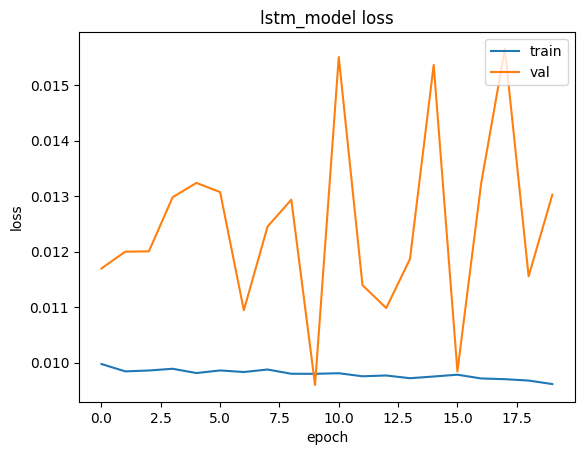

Train RMSE [0.10239718109369278, 0.09677688032388687, 0.09907522052526474]
Validation RMSE [0.16357839107513428, 0.10369191318750381, 0.1141325831413269]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = train_dataset_X.shape[1]
number_of_rows = train_dataset_X.shape[0]
number_of_columns = train_dataset_X.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/adversarial_training_data_augment'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='electricity_augmented_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(train_dataset_X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = train_dataset_X[:train_index[-1]]
  train_y = train_dataset_y[:train_index[-1]]
  val_X = train_dataset_X[test_index[-1]:]
  val_y = train_dataset_y[test_index[-1]:]
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  rmse_train.append(lstm_model.evaluate(train_X, train_y)[1])

  rmse_val.append(lstm_model.evaluate(val_X, val_y)[1])

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.09941642731428146
Validation RMSE 0.12713429580132166


### Evaluate the model


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y_test = lstm_model.predict(test_X)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print("Test RMSE", rmse_test)

5/5 [==============================] - 0s 3ms/step
Test RMSE 0.0761108906608811


In [ ]:
lstm_model.evaluate(test_X,test_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761


[0.0057928673923015594, 0.07611089199781418]

### From the above code cells,
#### Train RMSE = 0.1120
#### Validation RMSE = 0.0843
#### Test RMSE = 0.0754

### Plot the graph of learned and actual labels in testing stage

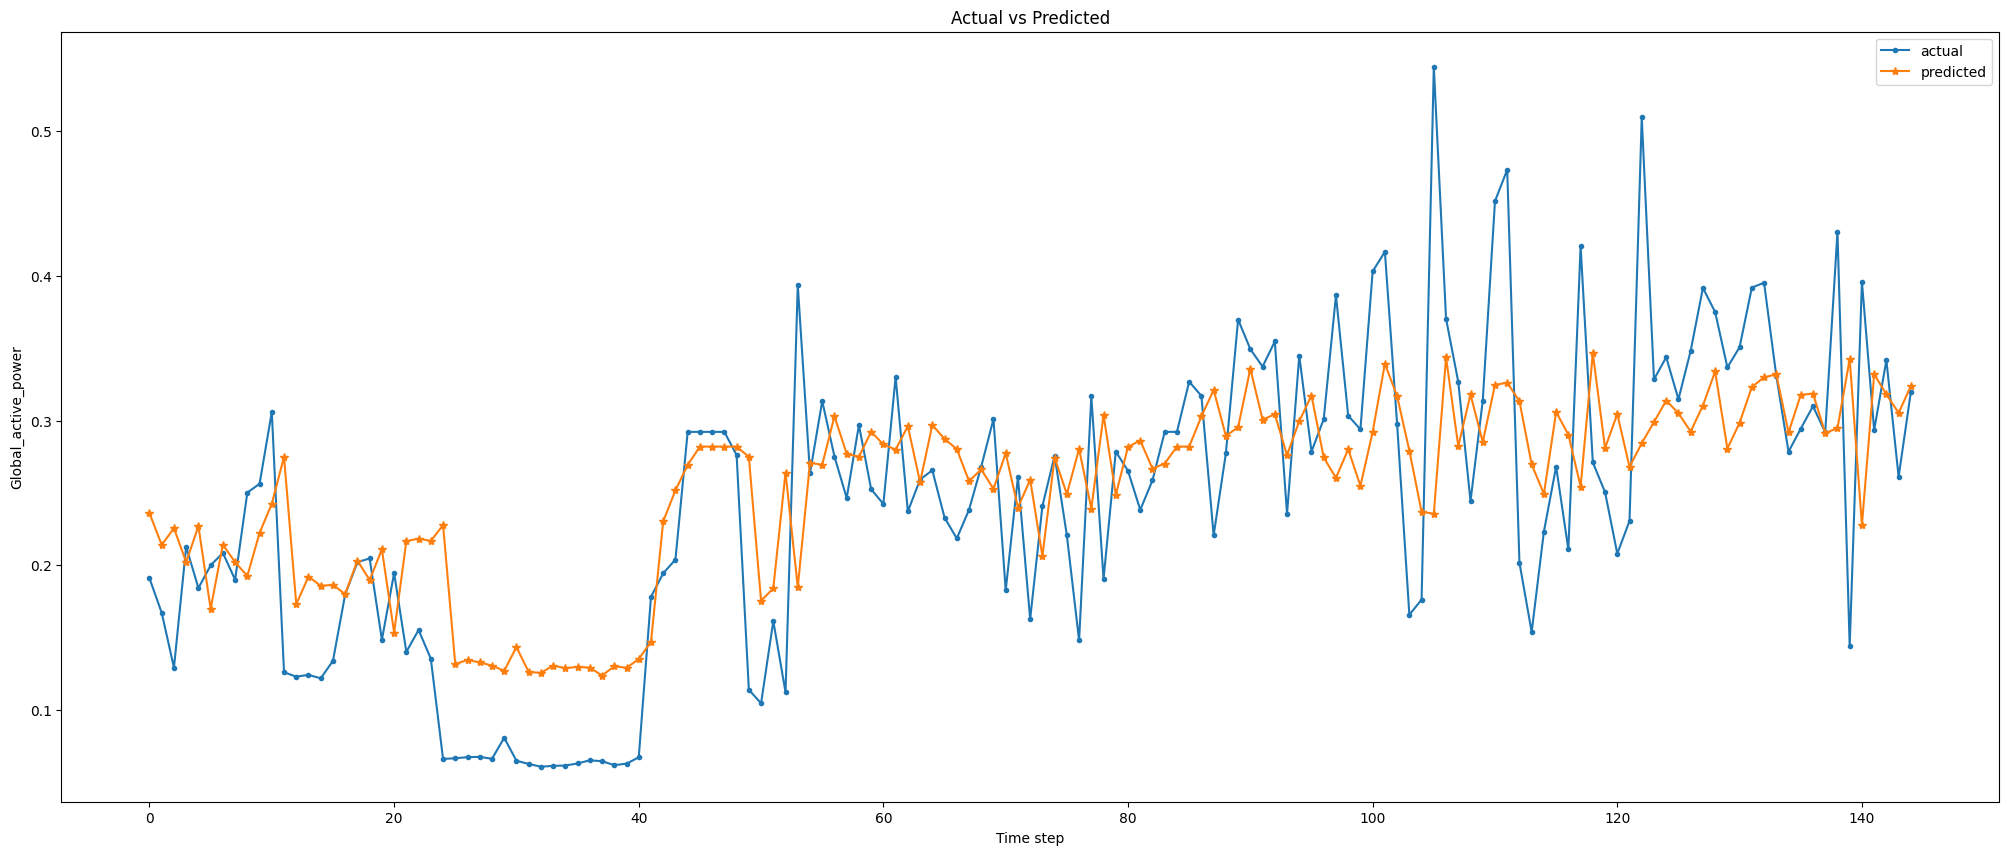

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_test)), pred_y_test[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Test the robust model on test data augmented with poisoned data

In [ ]:
test_X_tensor = tf.convert_to_tensor(test_X)
advX_6 = fgsm_attack(saved_model, 0.05, test_X, test_y)
advX_7 = fgsm_attack(saved_model, 0.1, test_X, test_y)
advX_8 = fgsm_attack(saved_model, 0.15, test_X, test_y)
advX_9 = fgsm_attack(saved_model, 0.2, test_X, test_y)
advX_10 = fgsm_attack(saved_model, 0.25, test_X, test_y)

test_dataset_X = tf.concat([test_X_tensor, advX_6, advX_7, advX_8, advX_9, advX_10], axis=0)
print(test_dataset_X.shape)
test_y_tensor = tf.convert_to_tensor(test_y)
test_dataset_y = tf.concat([test_y_tensor, test_y_tensor, test_y_tensor, test_y_tensor, test_y_tensor, test_y_tensor], axis=0)
print(test_dataset_y.shape)

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y = lstm_model.predict(test_dataset_X)
rmse_test = np.sqrt(mean_squared_error(test_dataset_y, pred_y))
print(rmse_test)

28/28 [==============================] - 0s 2ms/step
0.08472086373456669


In [ ]:
lstm_model.evaluate(test_dataset_X,test_dataset_y)

28/28 [==============================] - 0s 4ms/step - loss: 0.0072 - root_mean_squared_error: 0.0847


[0.007177624385803938, 0.08472086489200592]

### Plot the graph of learned and actual labels in testing stage

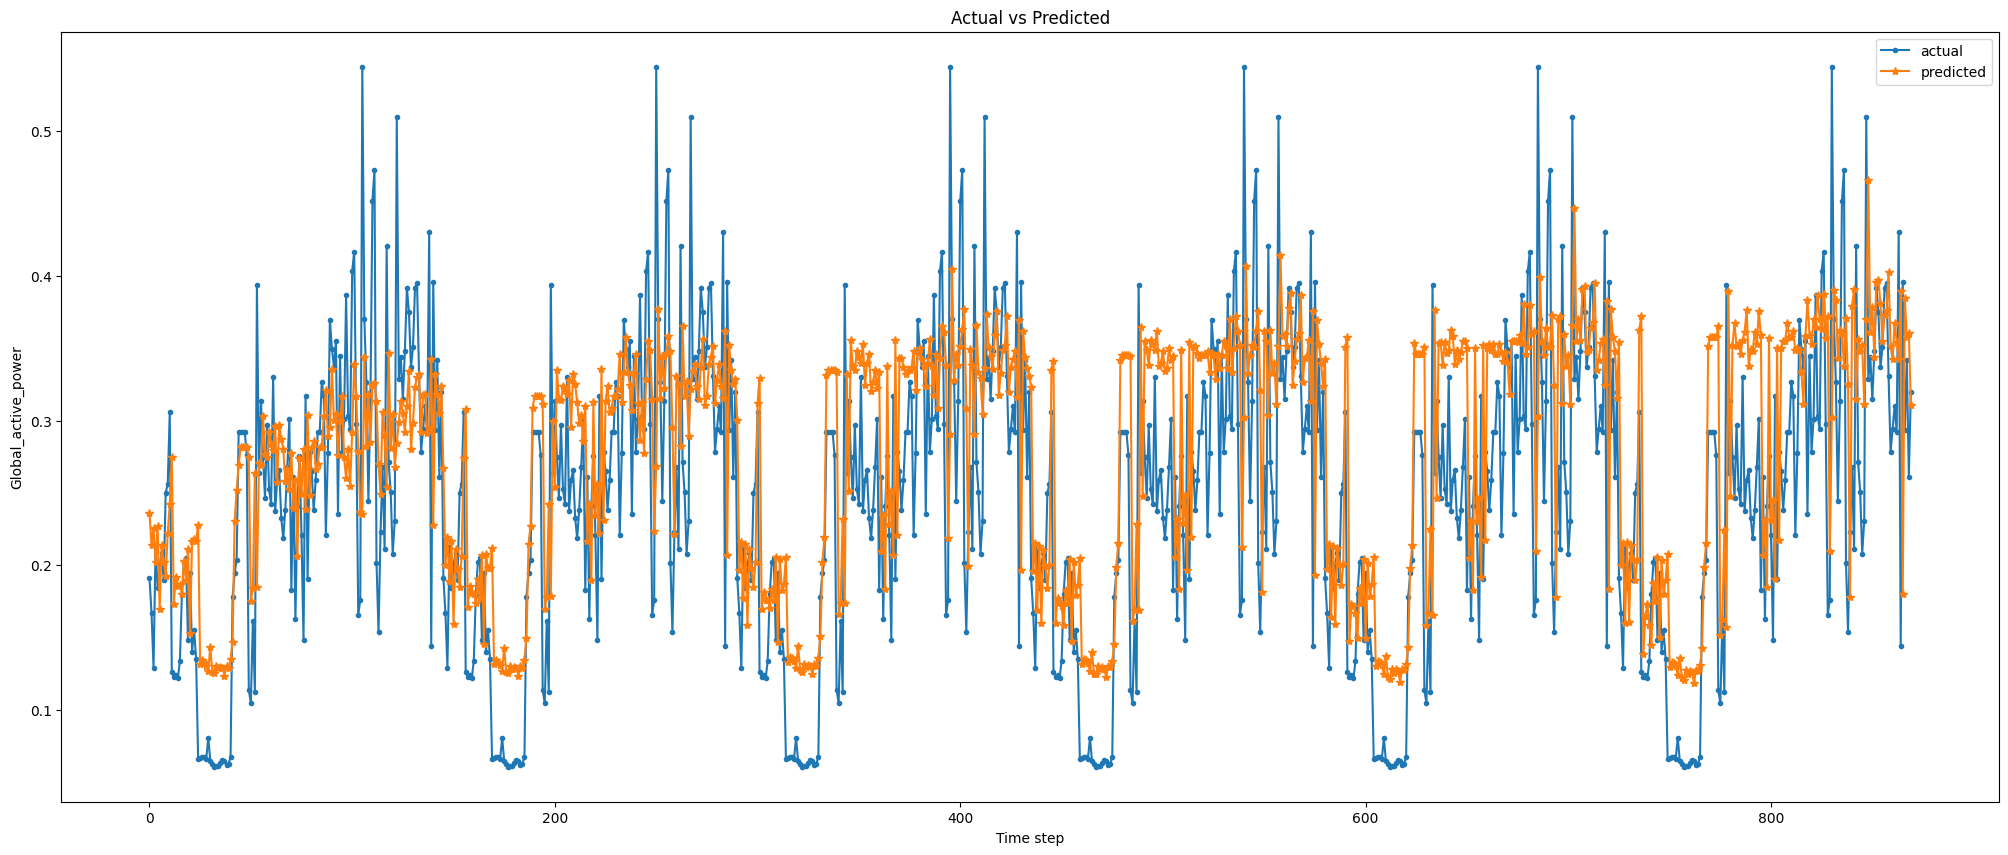

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_dataset_y)), test_dataset_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y)), pred_y[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Run the robust model on original dataset couple with 0.05 epsilon poisoning

In [ ]:
attack_rmse = []
rmse_6 = lstm_model.evaluate(advX_6, test_y)[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783


In [ ]:
pred_y_robust1 = lstm_model.predict(advX_6)

5/5 [==============================] - 0s 4ms/step


In [ ]:
print(rmse_6)
attack_rmse.append(rmse_6)

0.07826366275548935


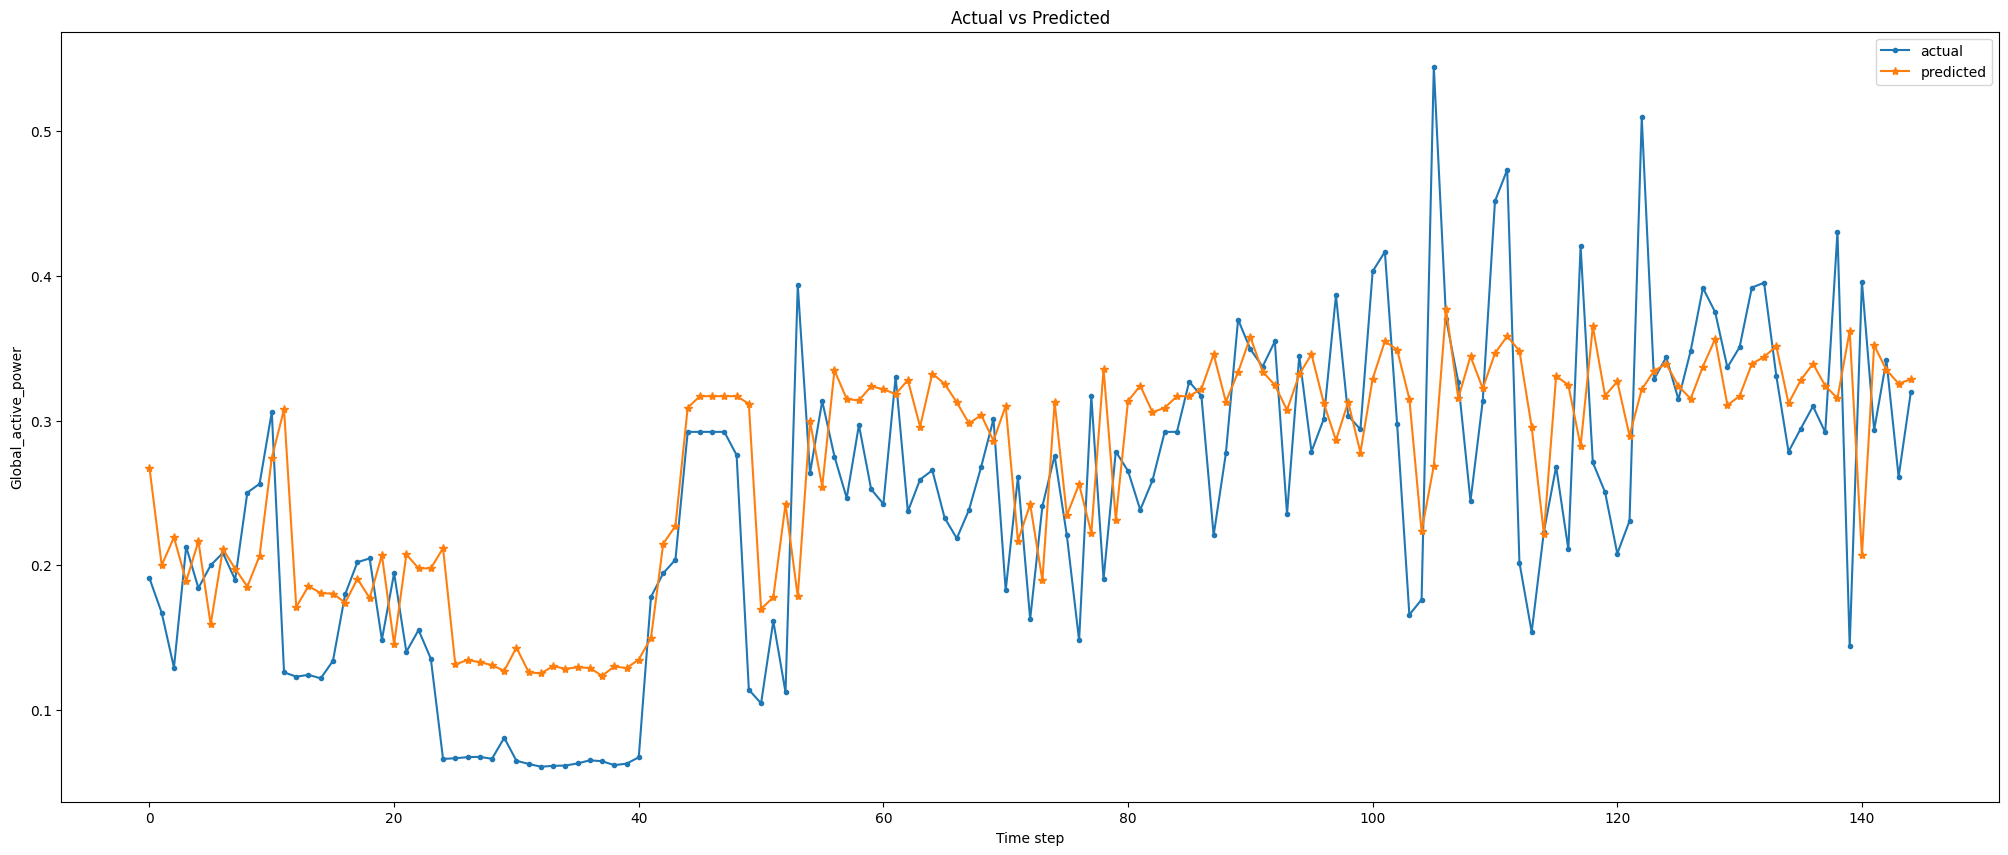

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_robust1)), pred_y_robust1[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Run the robust model on original dataset couple with 0.1 epsilon poisoning

In [ ]:
rmse_7 = lstm_model.evaluate(advX_7, test_y)[1]

5/5 [==============================] - 0s 8ms/step - loss: 0.0070 - root_mean_squared_error: 0.0835


In [ ]:
pred_y_robust2 = lstm_model.predict(advX_7)

5/5 [==============================] - 0s 4ms/step


In [ ]:
print(rmse_7)
attack_rmse.append(rmse_7)

0.08354479819536209


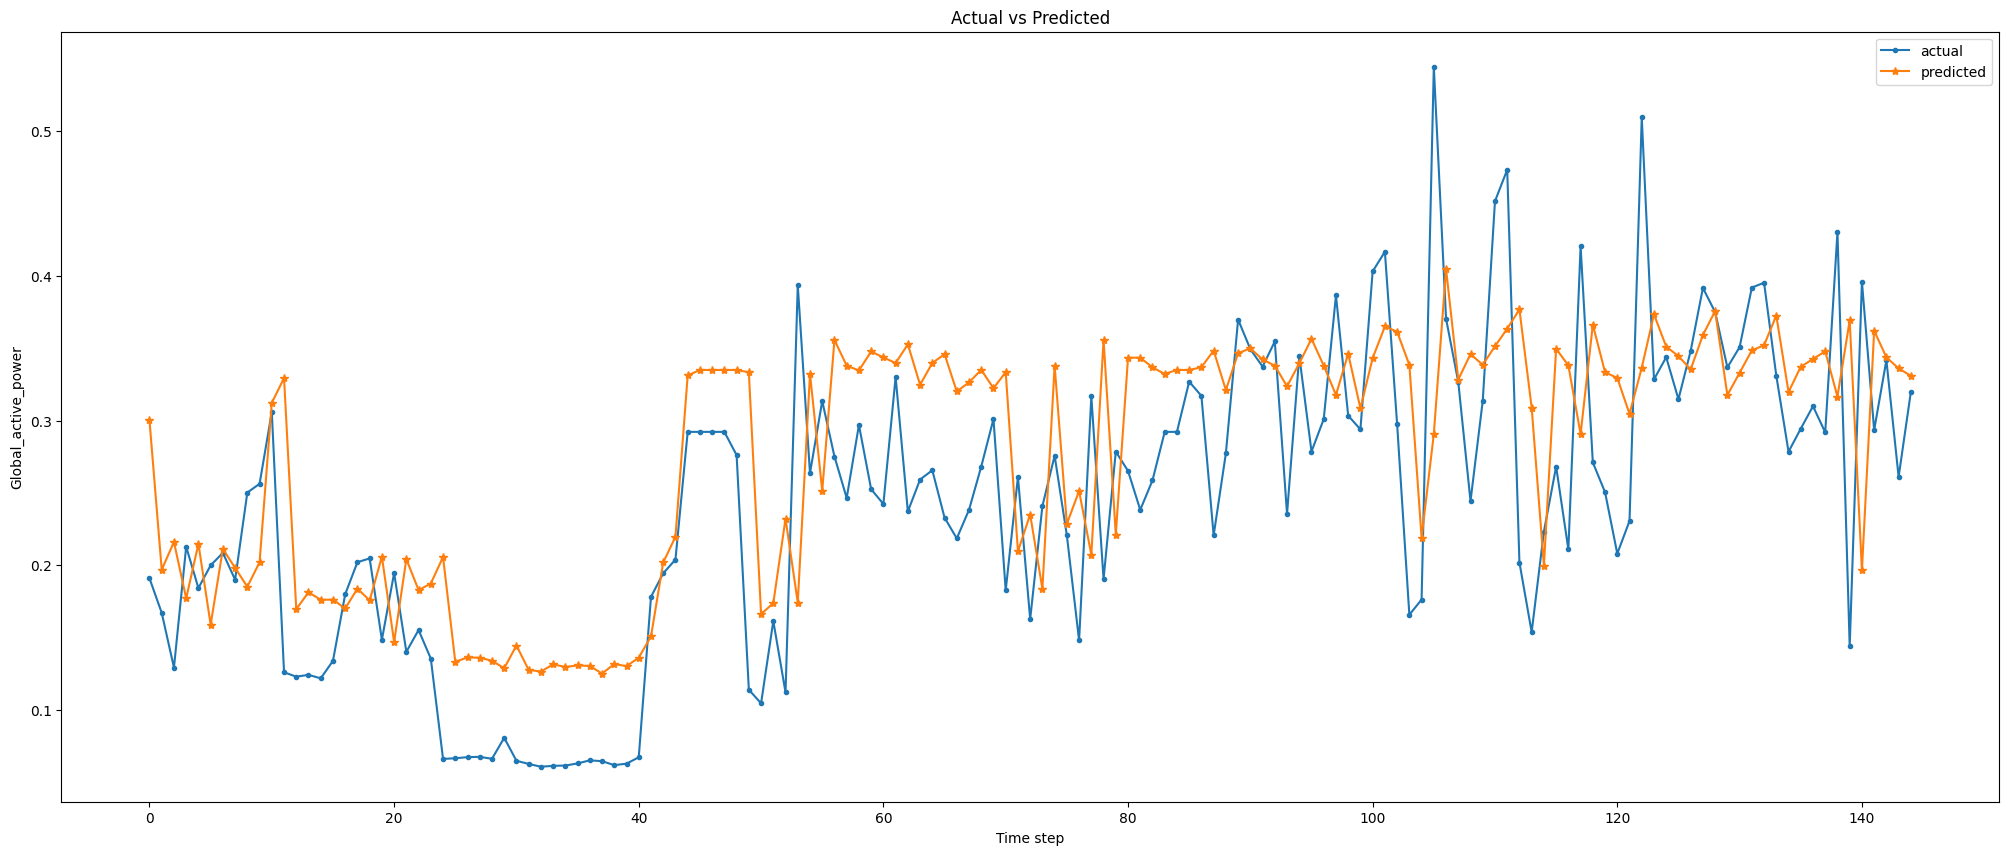

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_robust2)), pred_y_robust2[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Run the robust model on original dataset couple with 0.15 epsilon poisoning

In [ ]:
rmse_8 = lstm_model.evaluate(advX_8, test_y)[1]

5/5 [==============================] - 0s 6ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868


In [ ]:
pred_y_robust3 = lstm_model.predict(advX_8)

5/5 [==============================] - 0s 4ms/step


In [ ]:
print(rmse_8)
attack_rmse.append(rmse_8)

0.0867932066321373


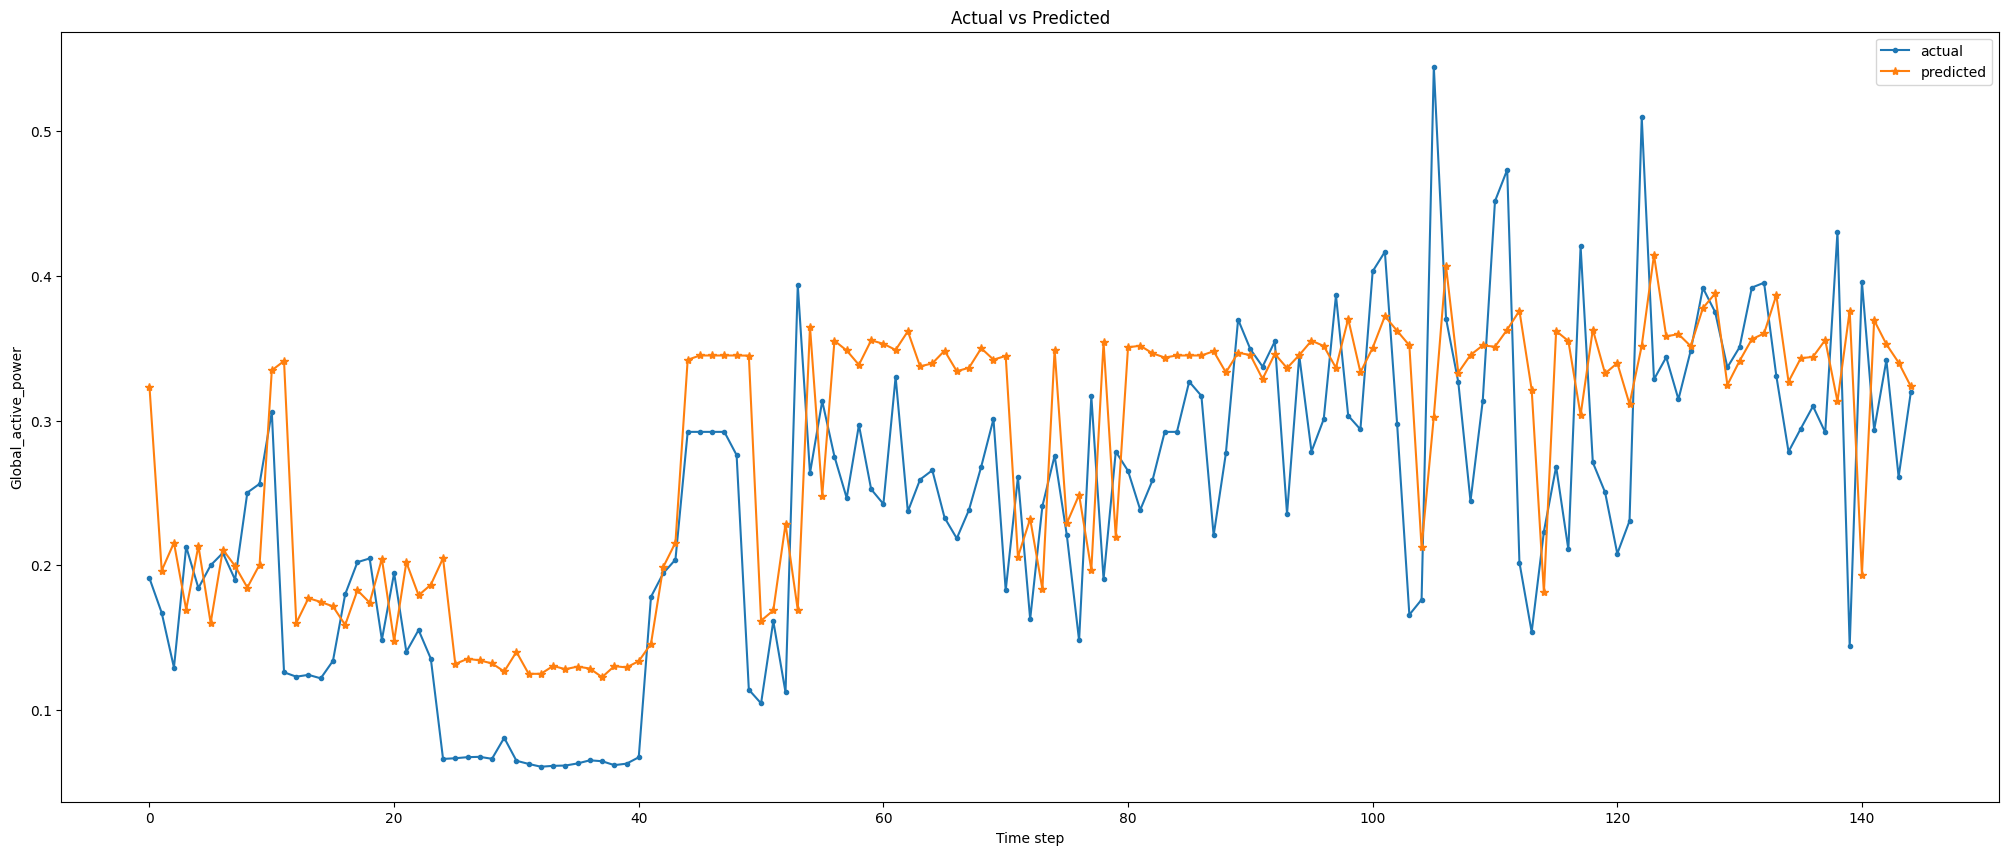

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_robust3)), pred_y_robust3[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Run the robust model on original dataset couple with 0.2 epsilon poisoning

In [ ]:
rmse_9 = lstm_model.evaluate(advX_9, test_y)[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - root_mean_squared_error: 0.0893


In [ ]:
pred_y_robust4 = lstm_model.predict(advX_9)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print(rmse_9)
attack_rmse.append(rmse_9)

0.08932794630527496


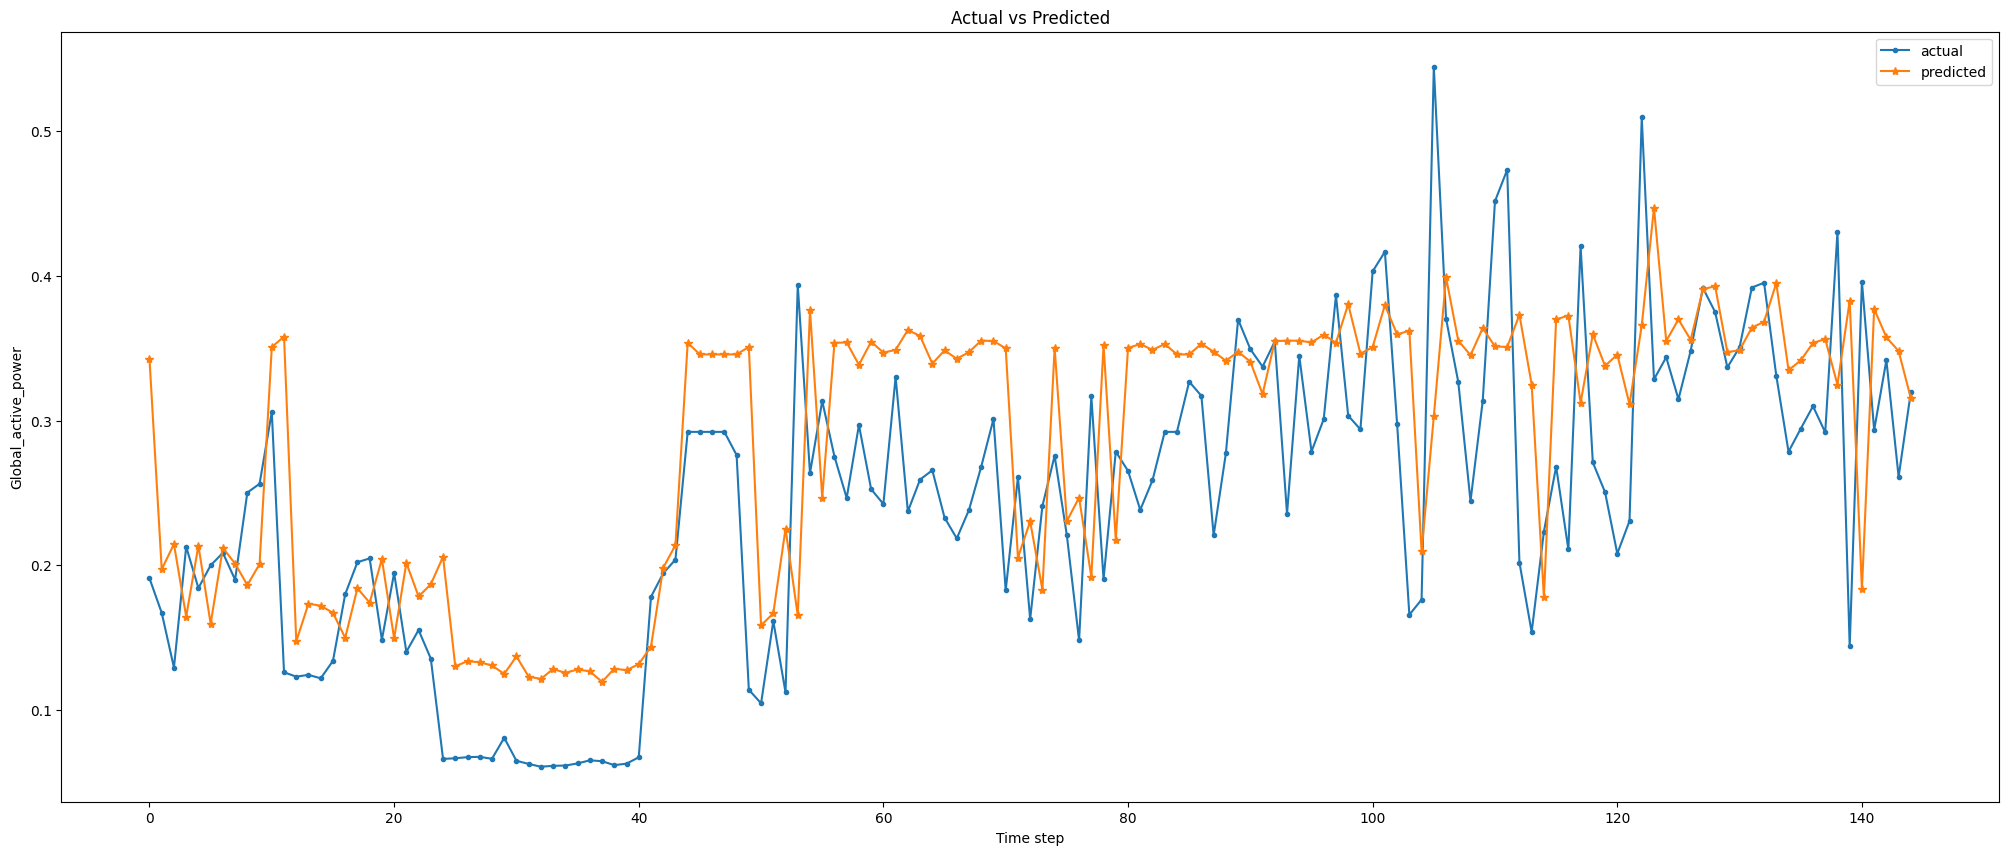

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_robust4)), pred_y_robust4[:], marker="*", label="predicted")
plt.legend()
plt.show()

### Run the robust model on original dataset couple with 0.1 epsilon poisoning

In [ ]:
rmse_10 = lstm_model.evaluate(advX_10, test_y)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - root_mean_squared_error: 0.0930


In [ ]:
pred_y_robust5 = lstm_model.predict(advX_10)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print(rmse_10)
attack_rmse.append(rmse_10)

0.09303442388772964


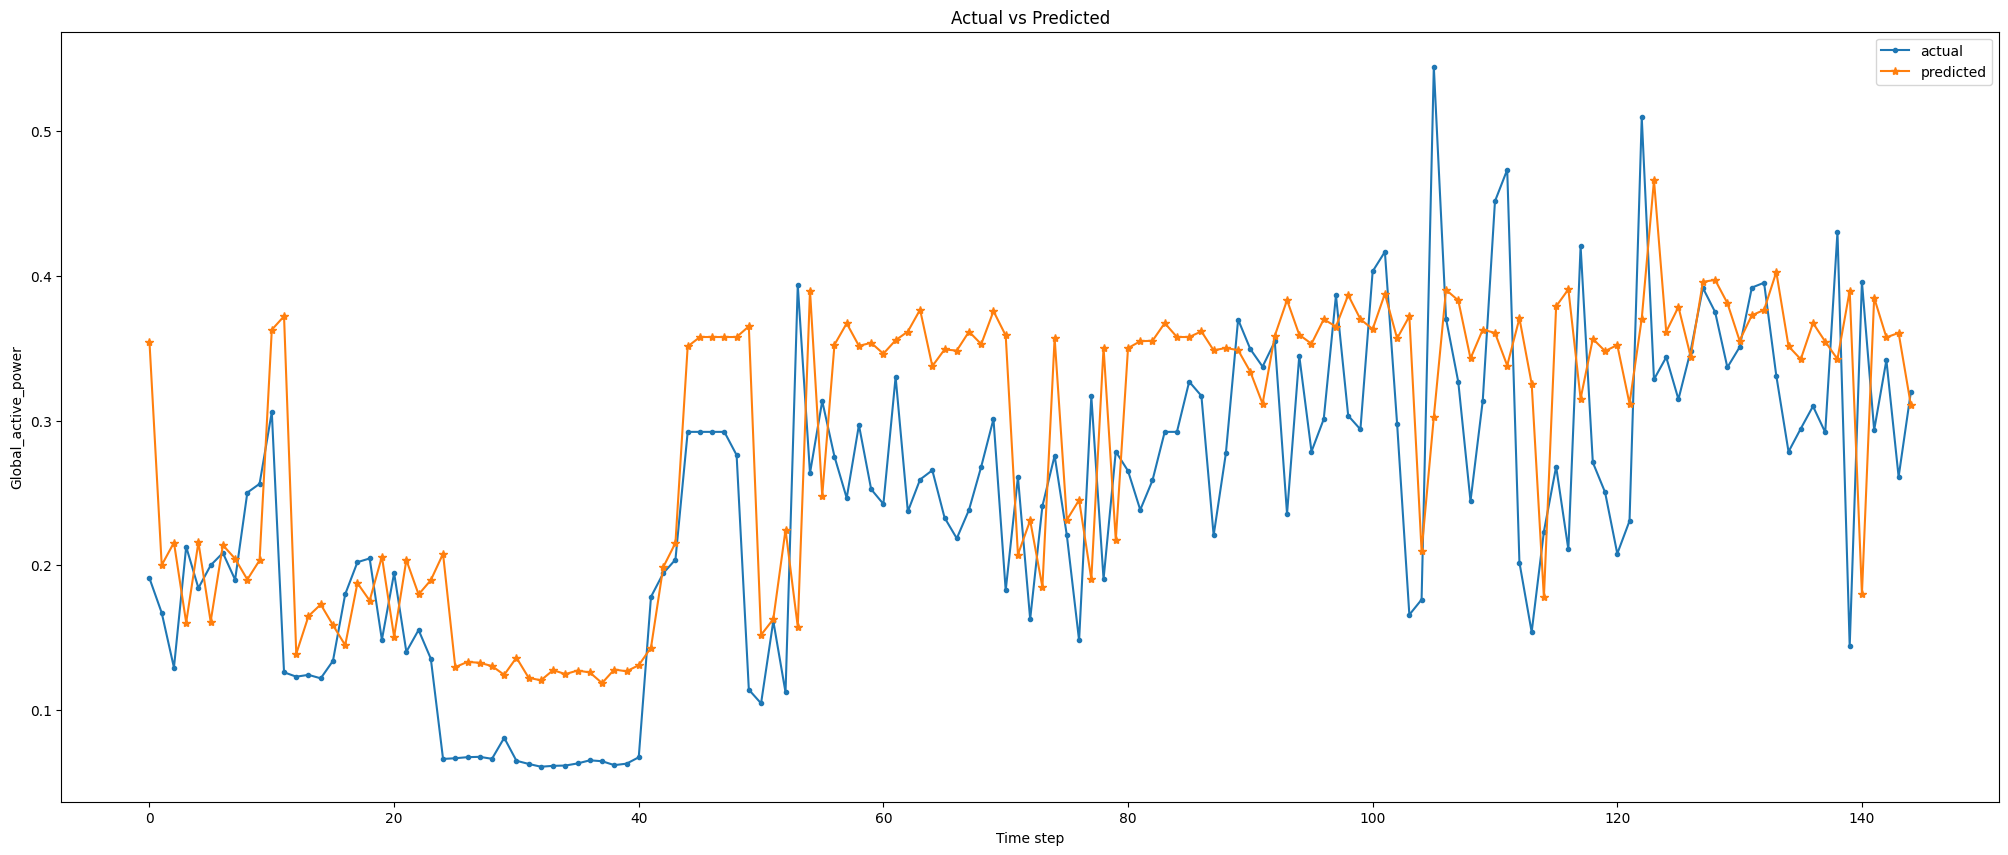

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_robust5)), pred_y_robust5[:], marker="*", label="predicted")
plt.legend()
plt.show()

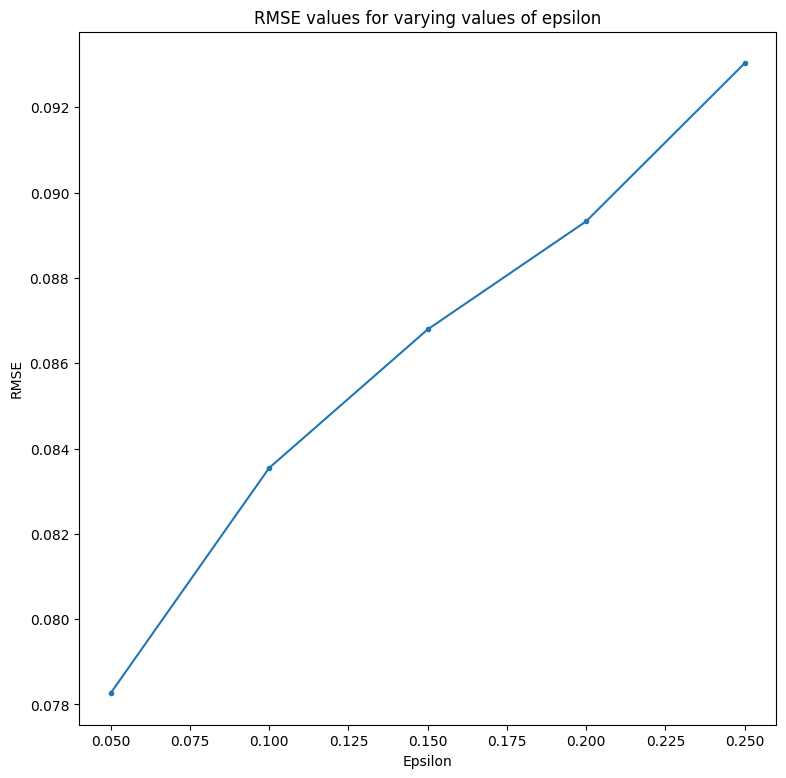

In [ ]:
epsilon = [0.05, 0.1, 0.15, 0.2, 0.25]
plt.figure(figsize=(9, 9))
plt.ylabel('RMSE')
plt.xlabel('Epsilon')
plt.title("RMSE values for varying values of epsilon")
plt.plot(epsilon, attack_rmse, marker=".",)
plt.show()

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.8, test_size=0.2, random_state=SEED, shuffle=False)
val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(1152, 8)
(145, 8)
(144, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1152, 1, 7) (1152,) (145, 1, 7) (145,)


# Actual reproduction of LPAT paper

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns), return_sequences=False))
    m1.add(Dropout(0.40))
    m1.add(Dense(1))
    print(m1.summary())

    # m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Prepare the metrics.
train_acc_metric = keras.metrics.RootMeanSquaredError()
val_acc_metric = keras.metrics.RootMeanSquaredError()

In [ ]:
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]
model = create_model_as_m1(time_steps, number_of_columns)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100)               43200     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43301 (169.14 KB)
Trainable params: 43301 (169.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
def perturb_weights(gradient):
  import numpy as np
  g_perturb = []
  for i in range(len(gradient)):
    g_perturb.append(0.1 * np.sign(gradient[i]))
  return g_perturb

In [ ]:
# Calculate root mean squared error
import numpy as np
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return np.sqrt(mean_error)

In [ ]:
def plot(actual_y, attack_prediction):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(25, 10))
  plt.ylabel('Global_active_power')
  plt.xlabel('Time step')
  plt.title("Actual vs Predicted")
  plt.plot(range(len(actual_y)), actual_y[:], marker=".", label="actual")
  plt.plot(range(len(attack_prediction)), attack_prediction, marker="*", label="predicted")
  plt.legend()
  plt.show()

In [ ]:
def robust_model(model, epochs, train_X, train_y, val_X, val_y, optimizer, train_acc_metric, val_acc_metric): #=> gradient
  import numpy as np
  # epochs = 20
  data = train_X
  label = train_y

  for epoch in range(epochs):
      # print("\nStart of epoch %d" % (epoch,))

      with tf.GradientTape() as tape:
        # tape.watch(data)
        '''  FIRST ROUND OF LPAT:
        1. Perform feedforward process to compute the output of the neural network '''
        predictions = model(data, training=True)
        # print("Predictions", predictions)
        loss = tf.keras.losses.MSE(label, predictions)
      ''' 2. Perform backpropagation to update parameters (weights) and store gradient in accumulation layers'''
      gradient = tape.gradient(loss, model.trainable_weights)
      gradient = np.array(gradient)
      # print(gradient.shape)
      optimizer.apply_gradients(zip(gradient, model.trainable_weights))
      # data += gradient[len(gradient)-1]
      ''' 3. Perform layerwise perturbation process based on gradients to each layer, and perform feedforward process to compute new output of the neural network'''
      gradient = perturb_weights(gradient)
      with tf.GradientTape() as tape:
        # tape.watch(data)
        predictions = model(data, training=True)
        # print("Predictions", predictions)
        loss = tf.keras.losses.MSE(label, predictions)
      ''' Finally, it performs backpropoagation again to update parameters of all network layers'''
      gradient = tape.gradient(loss, model.trainable_weights)
      optimizer.apply_gradients(zip(gradient, model.trainable_weights))

      #Update training metric.
      train_acc_metric.update_state(train_y, predictions)

      # data += gradient[len(gradient)-1]

      # with tf.GradientTape() as tape:
      #   # tape.watch(data)
      #   predictions = model(data)
      #   loss = tf.keras.losses.MSE(label, predictions)
      # gradient = tape.gradient(loss, model.trainable_weights)
      # gradient = np.array(gradient)
      # optimizer.apply_gradients(zip(gradient, model.trainable_weights))
      # data += gradient[len(gradient)-1]

      # Log every 10 epochs.
      if epoch % 10 == 0:
          print("Loss", np.mean(loss))
      # Display metrics at the end of each epoch.
      train_acc = train_acc_metric.result()
      print("Training RMSE over epoch: %.4f" % (float(train_acc),))

      # Reset training metrics at the end of each epoch
      train_acc_metric.reset_states()

      # Run a validation loop at the end of each epoch.
      val_logits = model(val_X, training=False)
      # Update val metrics
      val_acc_metric.update_state(val_y, val_logits)
      val_acc = val_acc_metric.result()
      val_acc_metric.reset_states()
      print("Validation RMSE: %.4f" % (float(val_acc),))
  rmse = rmse_metric(label, predictions)
  return rmse, predictions

In [ ]:
rmse_train, train_predictions = robust_model(model, 7, train_X, train_y, val_X, val_y, optimizer, train_acc_metric, val_acc_metric)

<ipython-input-284-6d335b6dd272>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gradient = np.array(gradient)


Loss 0.07334183
Training RMSE over epoch: 0.2679
Validation RMSE: 0.1752
Training RMSE over epoch: 0.1688
Validation RMSE: 0.0818
Training RMSE over epoch: 0.1348
Validation RMSE: 0.1343
Training RMSE over epoch: 0.1646
Validation RMSE: 0.1373
Training RMSE over epoch: 0.1461
Validation RMSE: 0.0984
Training RMSE over epoch: 0.1291
Validation RMSE: 0.0770
Training RMSE over epoch: 0.1349
Validation RMSE: 0.0828


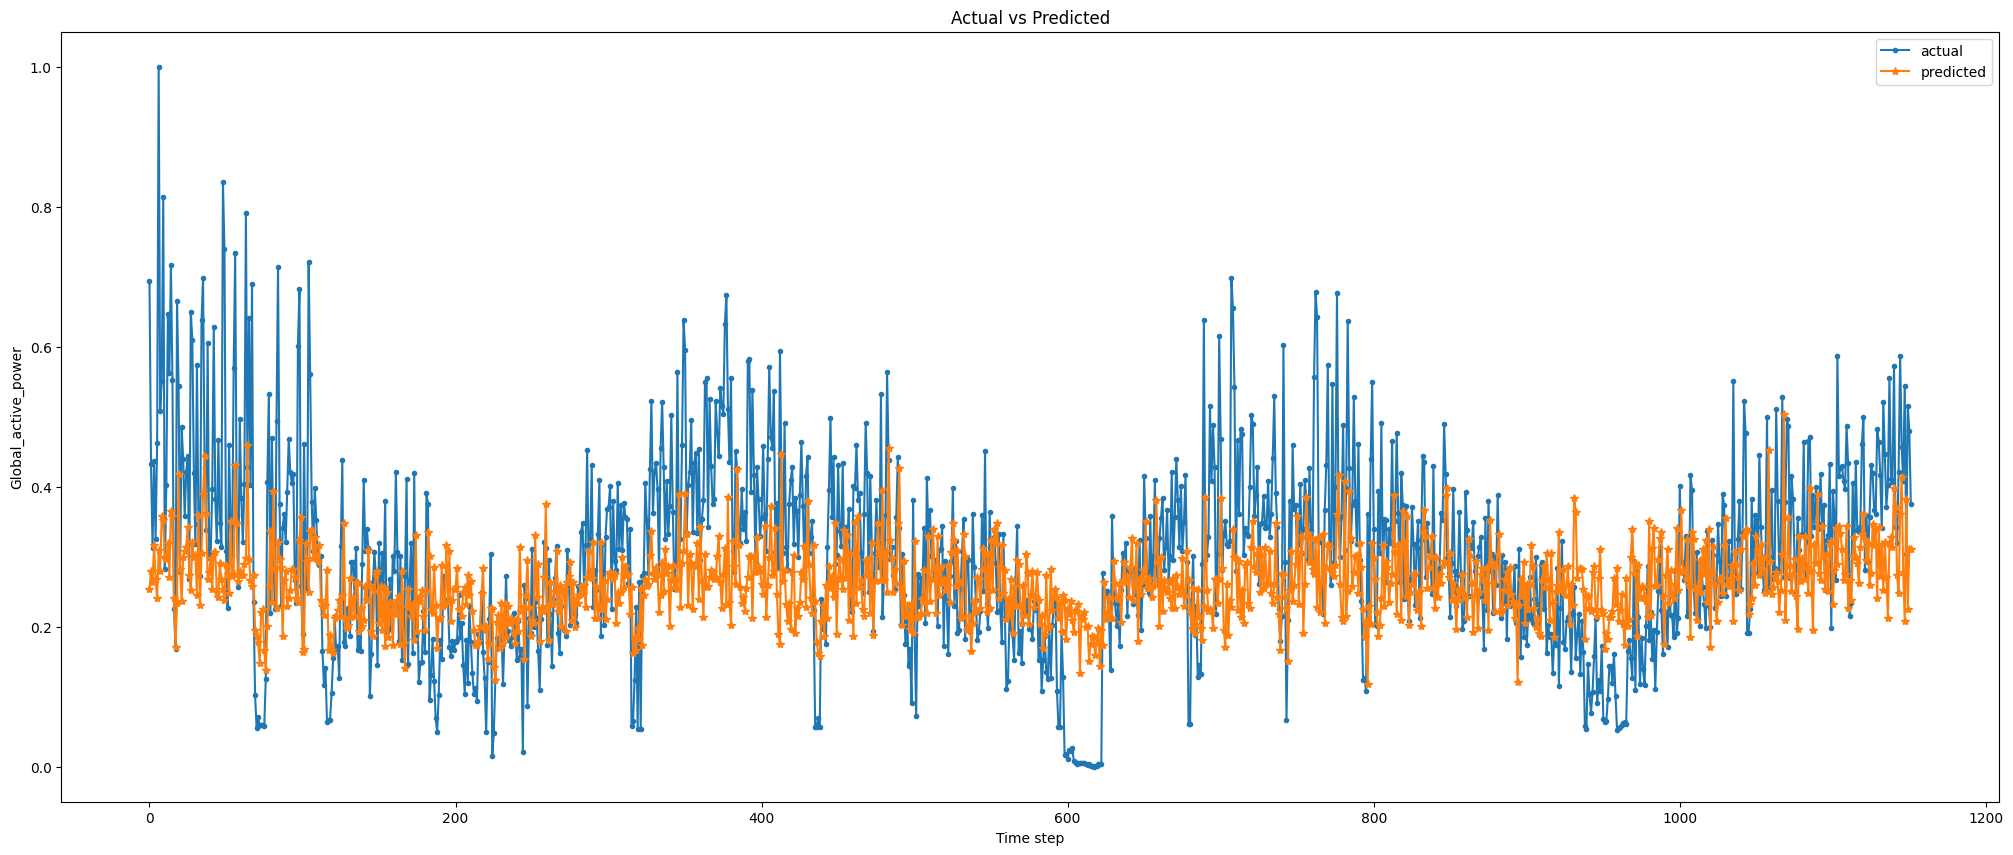

In [ ]:
plot(train_y, train_predictions)

In [ ]:
rmse_train

array([0.13485233], dtype=float32)

In [ ]:
with tf.GradientTape() as tape:
  # tape.watch(data)
  predictions = model(test_X, training=False)
  # print("Predictions", predictions)
  loss = tf.keras.losses.MSE(test_y, predictions)
  print(np.mean(loss))

0.011758611


In [ ]:
p = model(test_X,training=False)

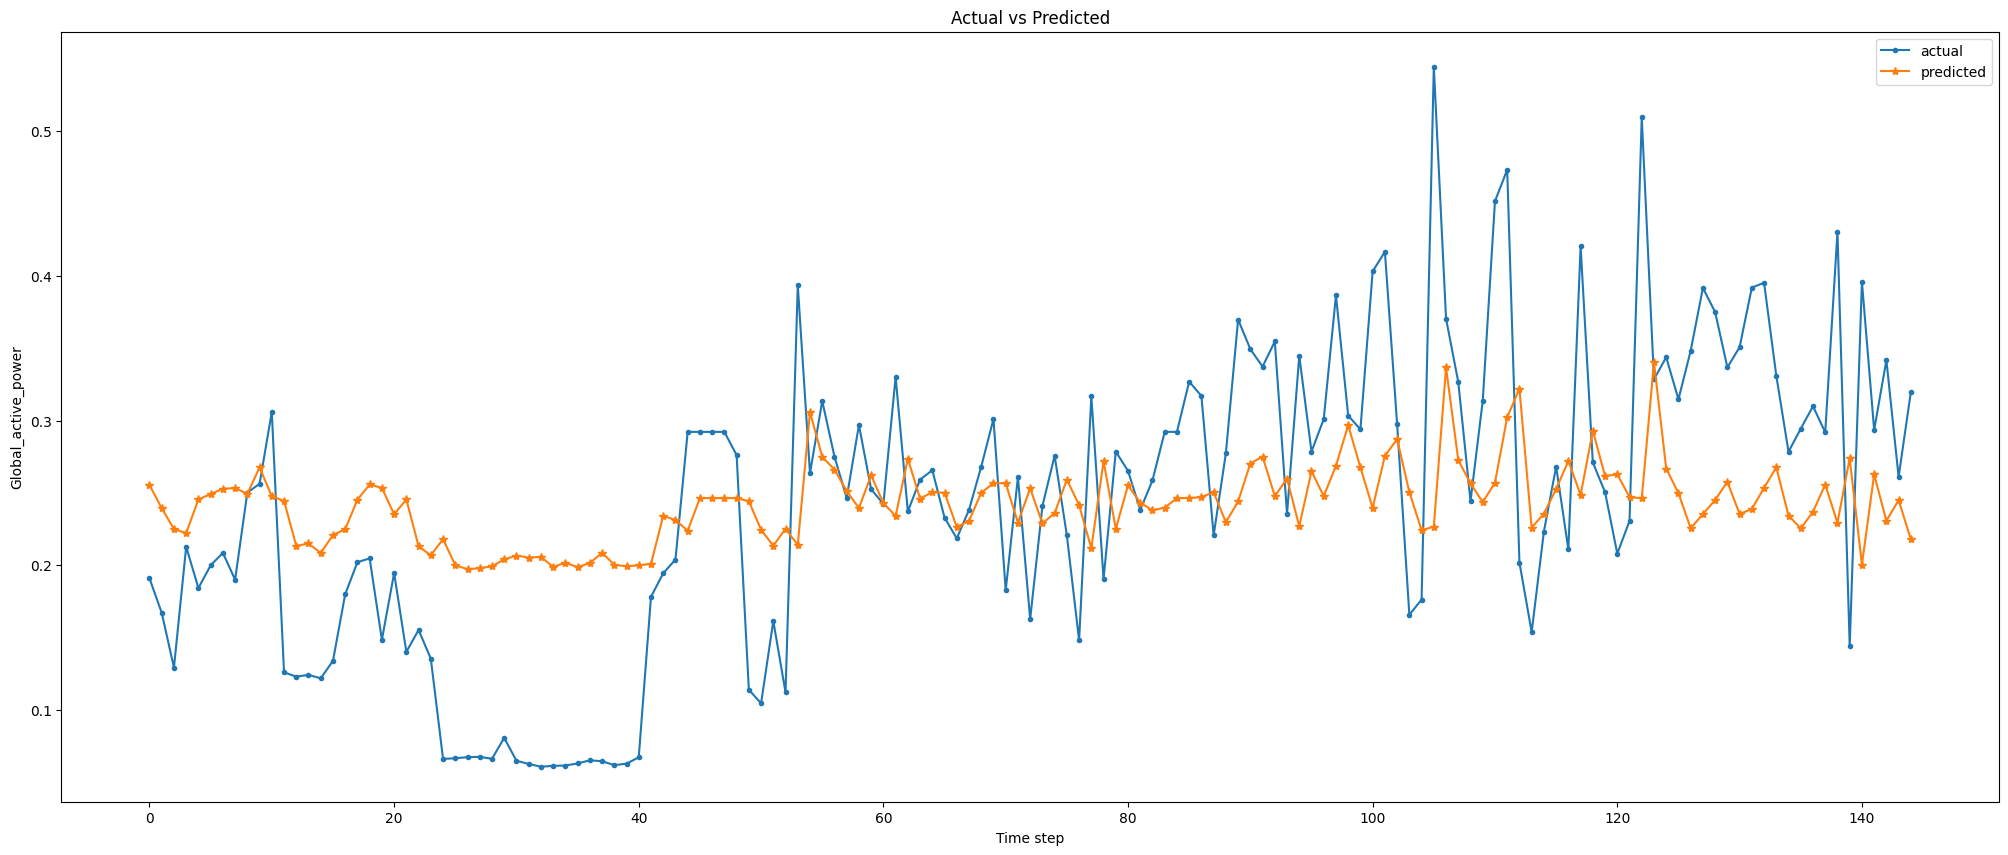

In [ ]:
plot(test_y,predictions)

In [ ]:
rmse_test = rmse_metric(test_y, p)

In [ ]:
rmse_test

array([0.0953246], dtype=float32)

In [ ]:
def fgsm_attack(model, epsilon, data, label):
  import numpy as np
  import tensorflow as tf
  data = tf.convert_to_tensor(data)
  with tf.GradientTape() as tape:
    tape.watch(data)
    predictions = model(data)
    print("Predictions", predictions)
    loss = tf.keras.losses.MSE(label, predictions)
  gradient = tape.gradient(loss, data)
  print(gradient.shape)
  advX = data + (epsilon * np.sign(gradient))
  return advX

In [ ]:
import tensorflow as tf
import keras
from keras.models import load_model
saved_model = load_model('3_fold_model.60-0.01.h5')
saved_model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
epsilon = [0.05, 0.1, 0.15, 0.2, 0.25]

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

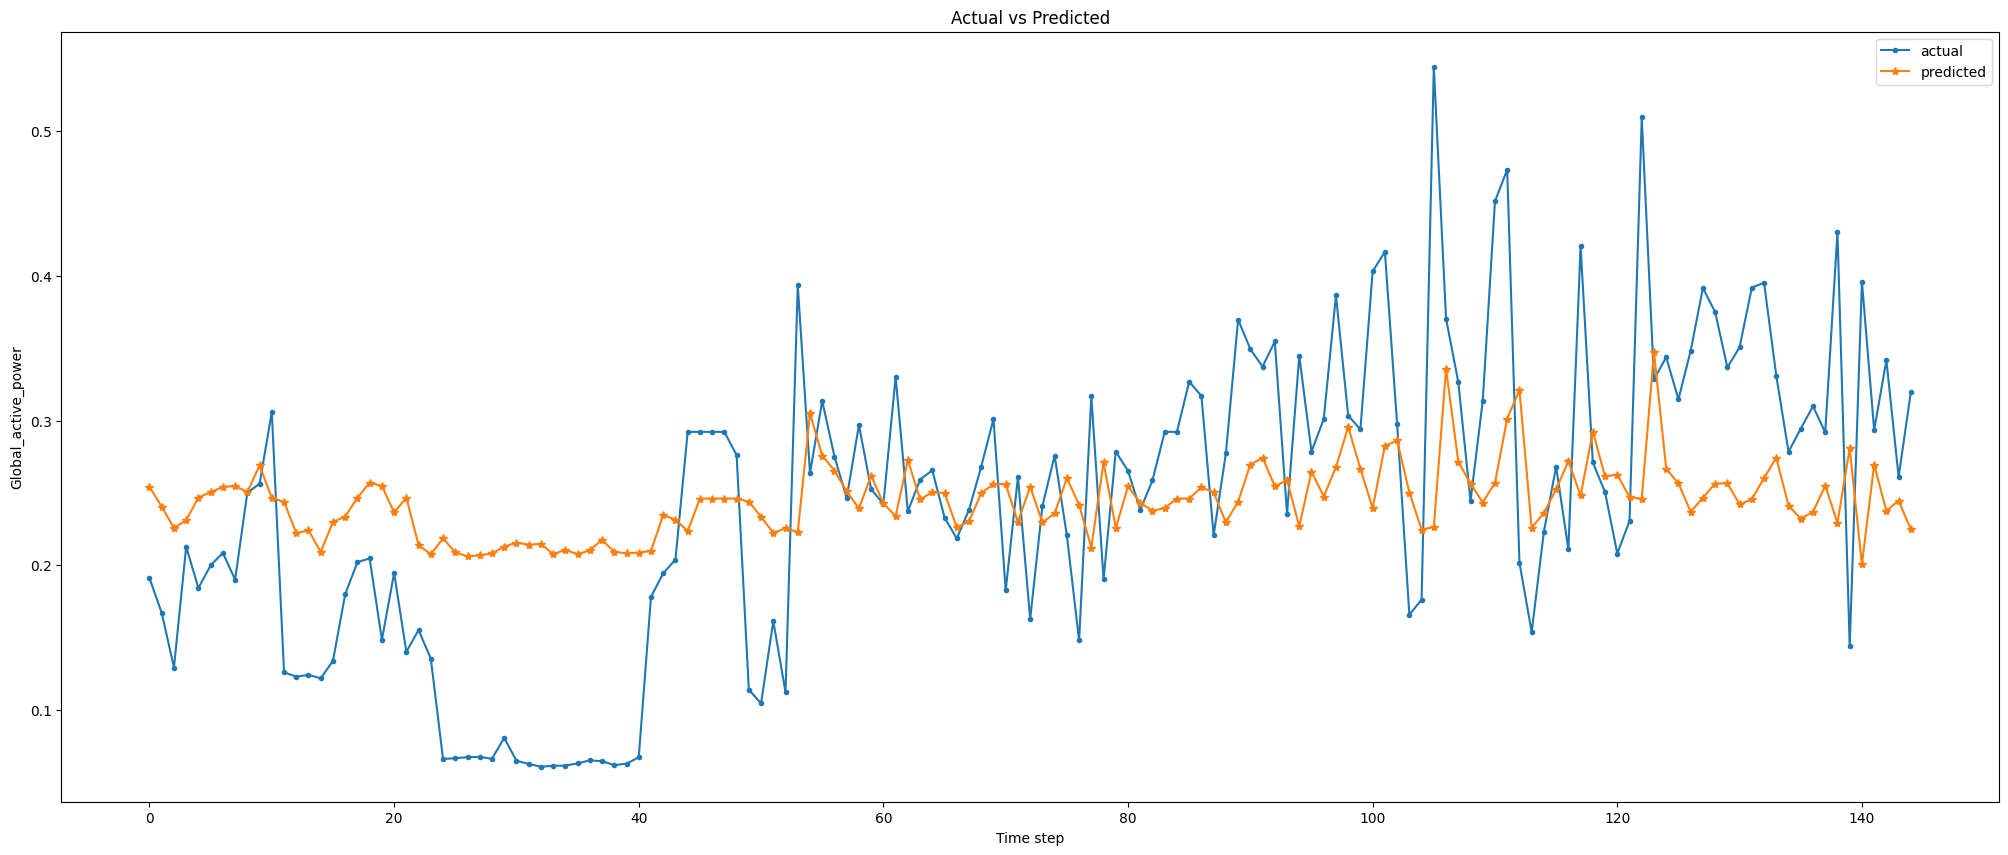

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

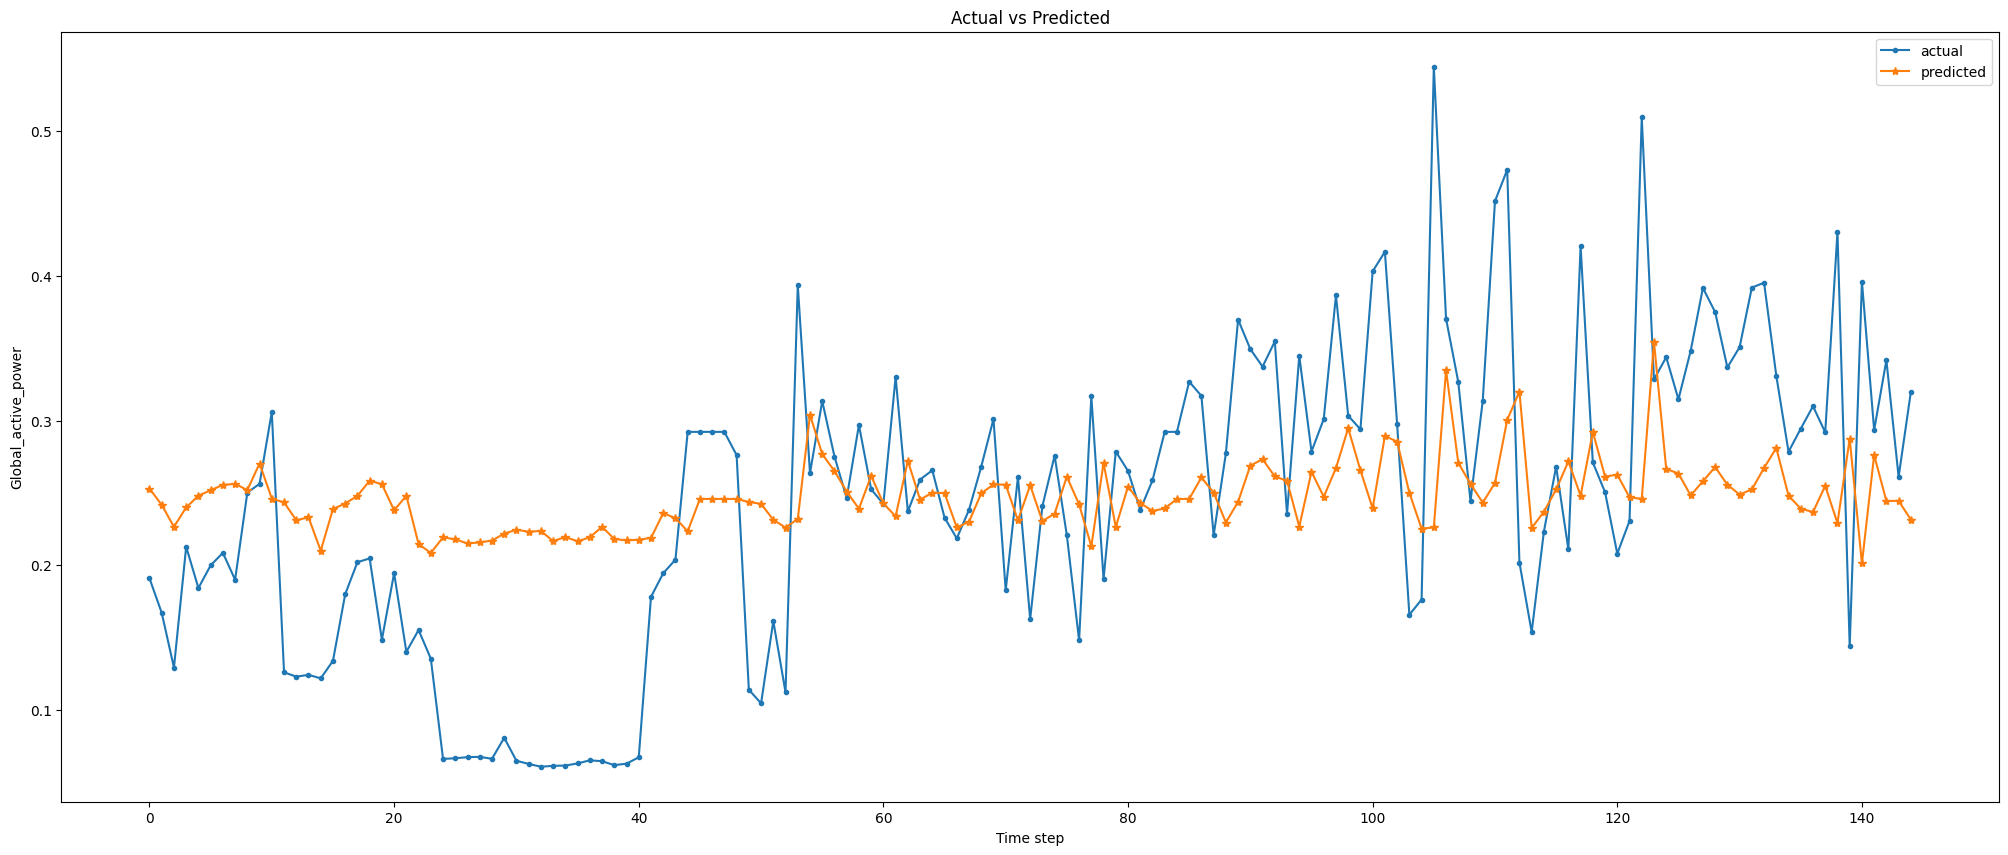

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

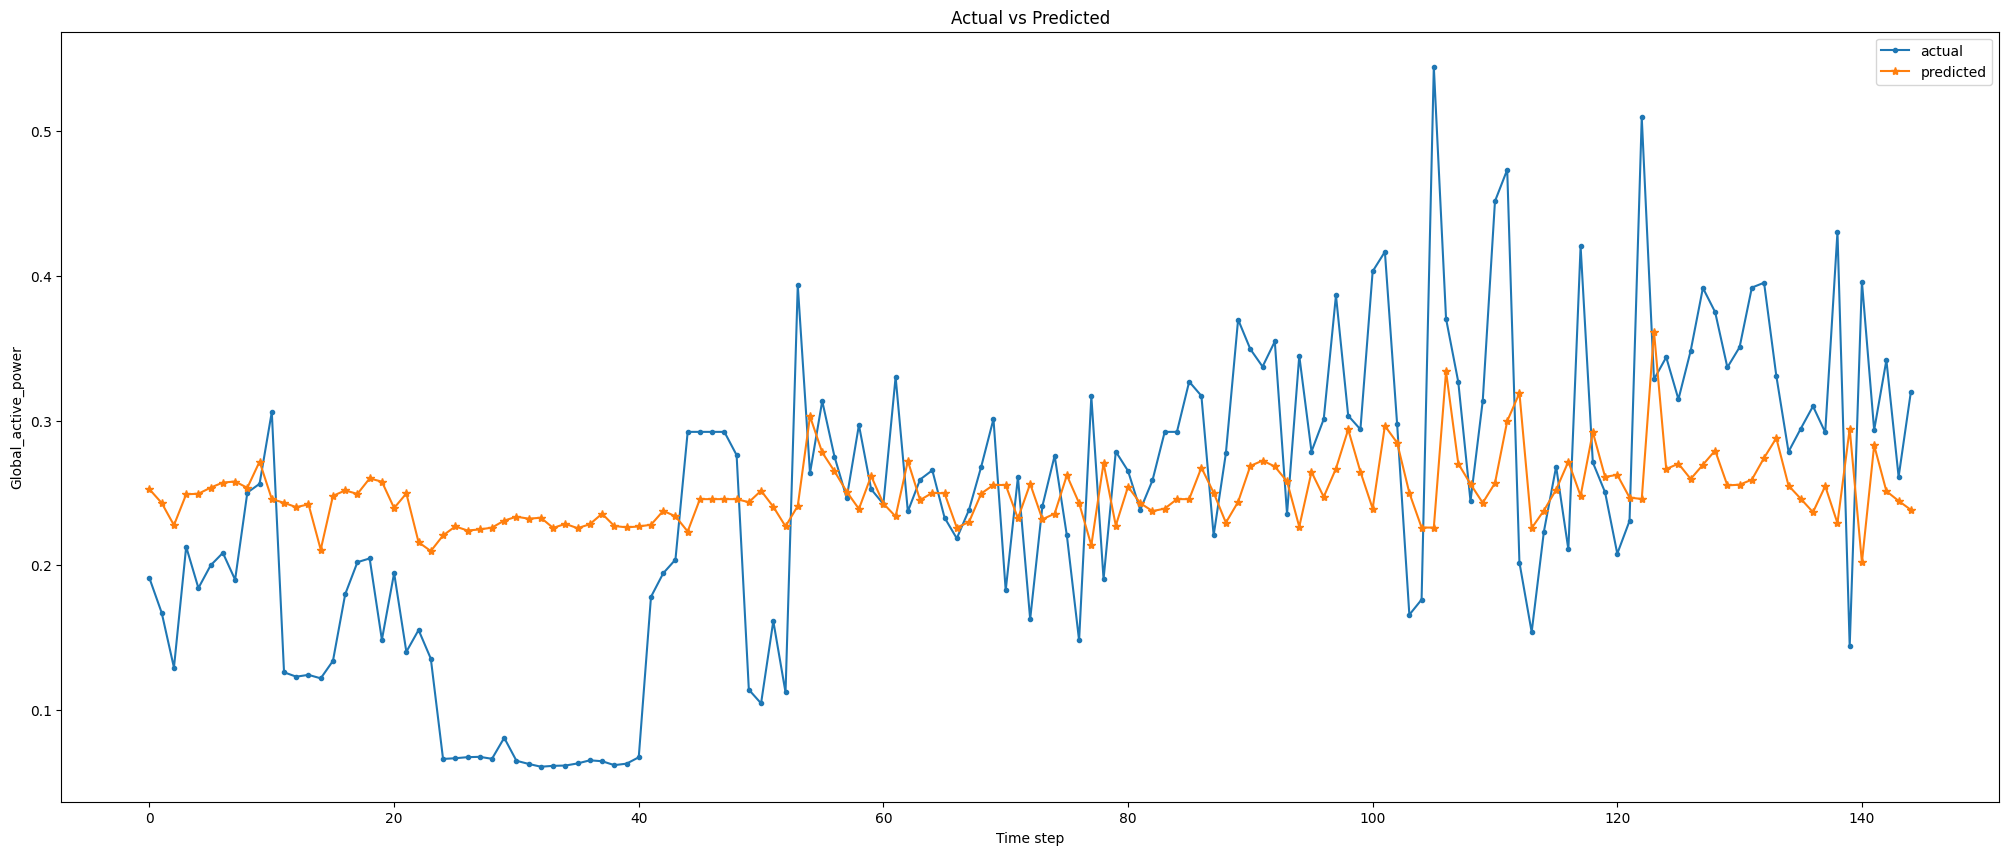

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

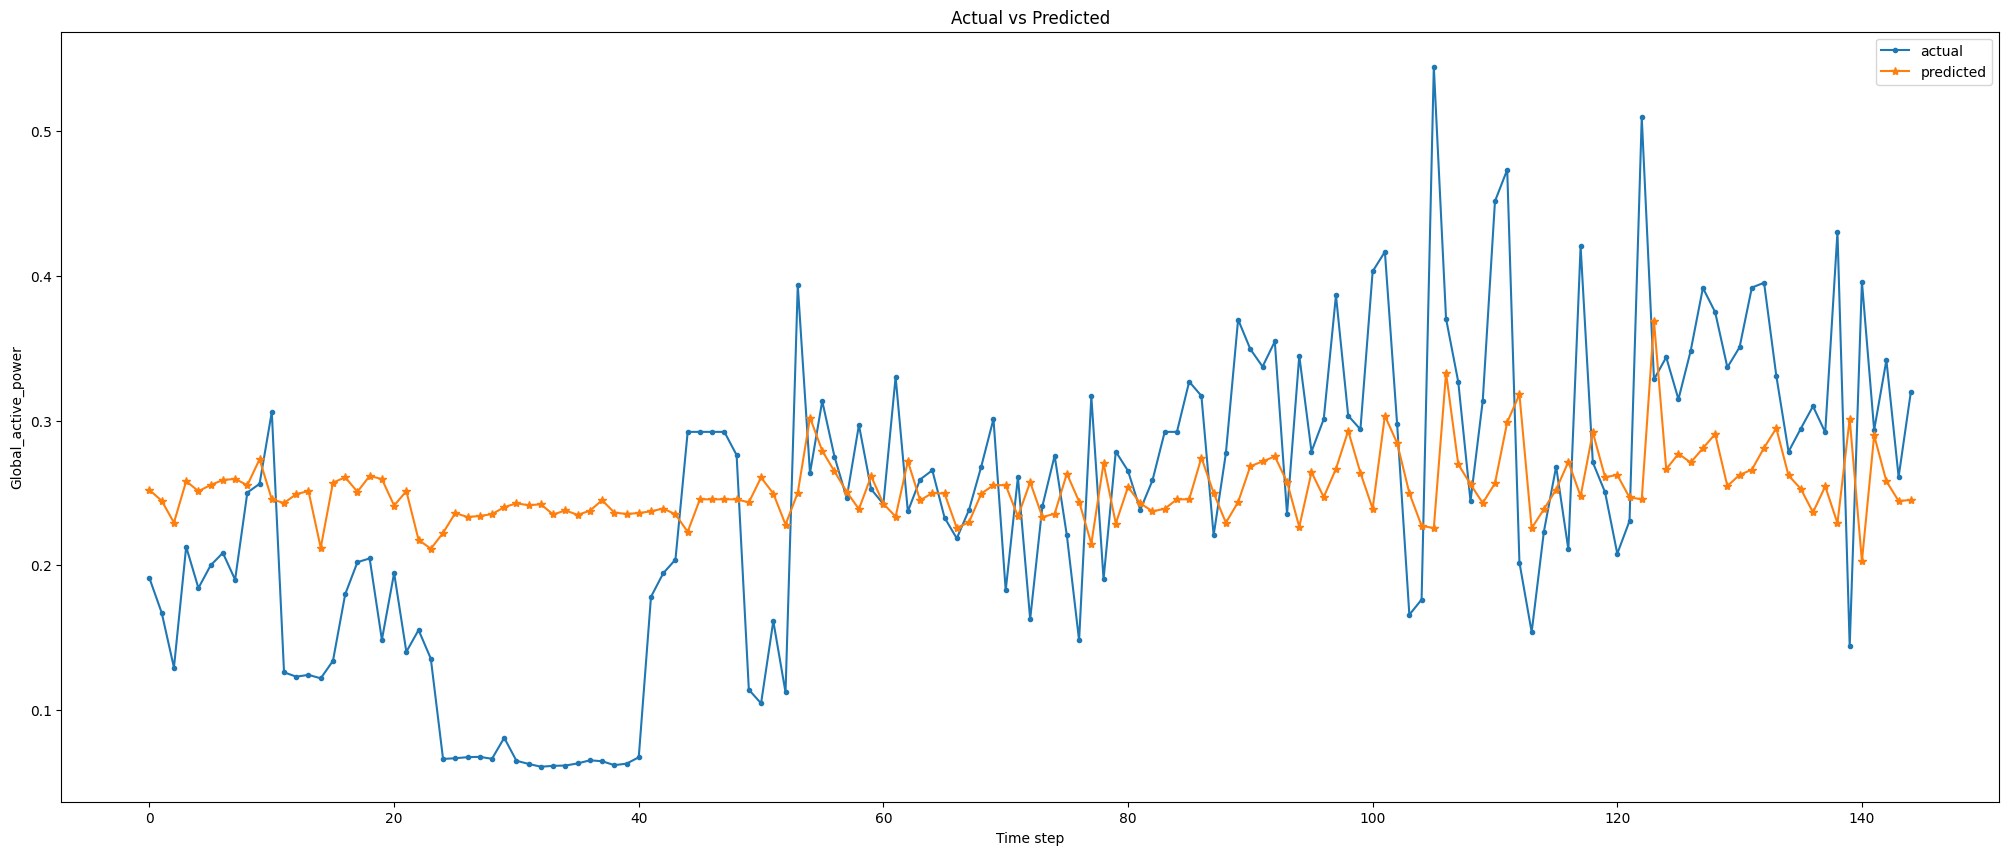

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

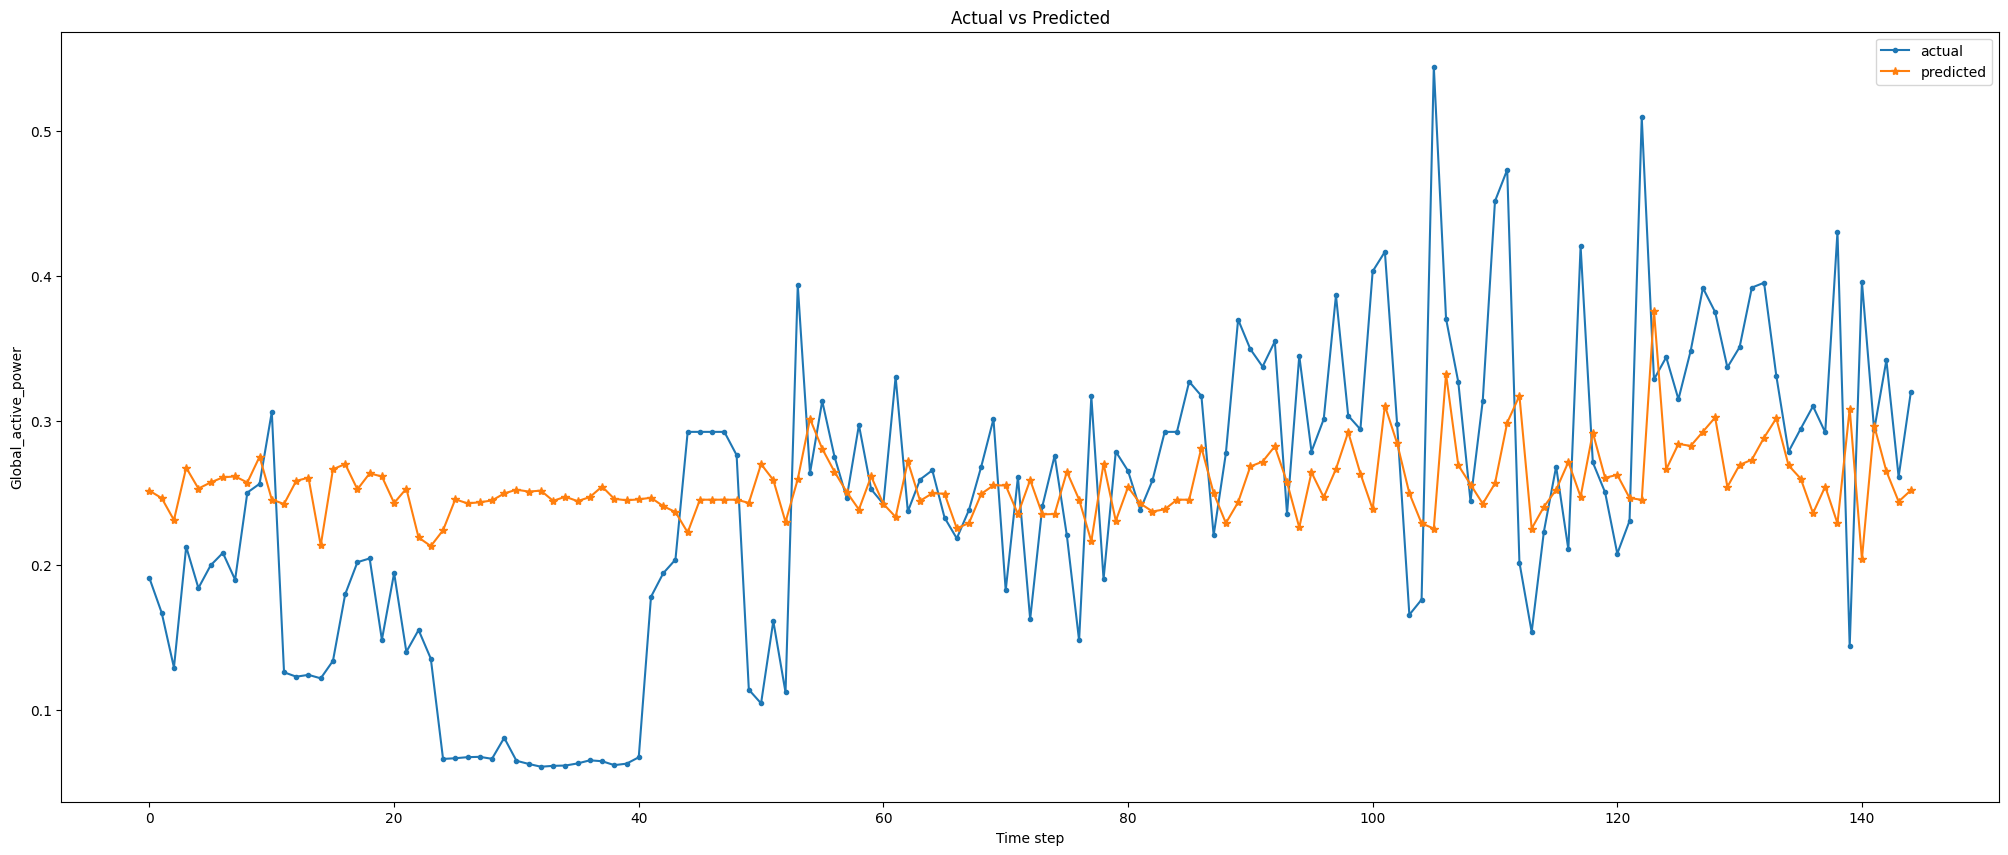

In [ ]:
advX = []
attack_prediction = []
rmse_attack = []
for i in range(len(epsilon)):
  advX.append(fgsm_attack(saved_model, epsilon[i], test_X, test_y))
  attack_prediction.append(model(advX[i],training=False))
  plot(test_y, attack_prediction[i])
  rmse_attack.append(rmse_metric(test_y, attack_prediction[i]))

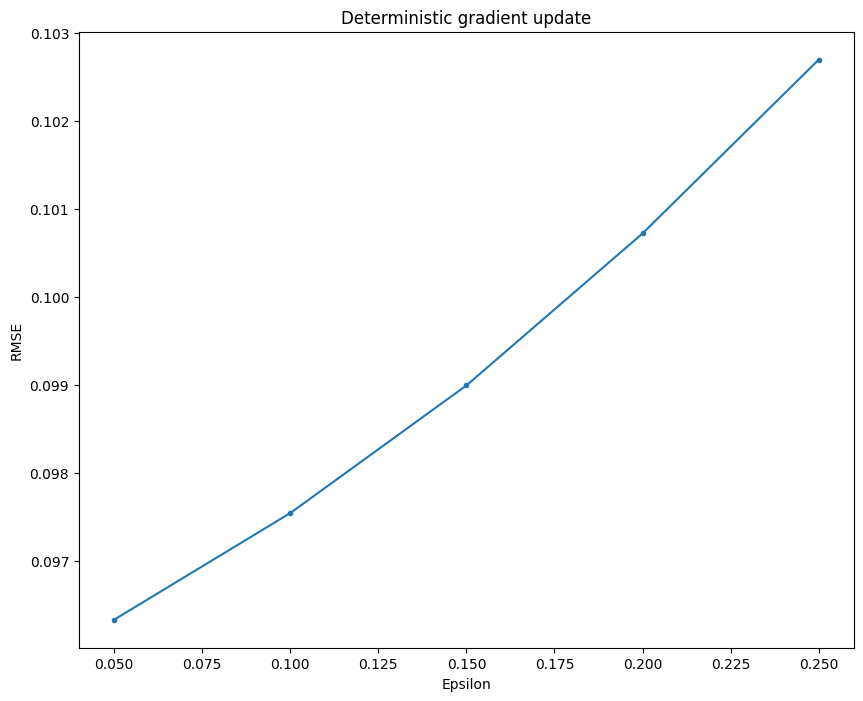

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.ylabel('RMSE')
plt.xlabel('Epsilon')
plt.title("Deterministic gradient update")
plt.plot(epsilon, rmse_attack, marker=".")
plt.show()

# Select random values within a specified range for epsilon

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.8, test_size=0.2, random_state=SEED, shuffle=False)
val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(1152, 8)
(145, 8)
(144, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1152, 1, 7) (1152,) (145, 1, 7) (145,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns), return_sequences=False))
    m1.add(Dropout(0.40))
    m1.add(Dense(1))
    print(m1.summary())

    # m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Prepare the metrics.
train_acc_metric = keras.metrics.RootMeanSquaredError()
val_acc_metric = keras.metrics.RootMeanSquaredError()

In [ ]:
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]
model = create_model_as_m1(time_steps, number_of_columns)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100)               43200     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43301 (169.14 KB)
Trainable params: 43301 (169.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
def perturb_weights(gradient):
  import random
  import numpy as np
  g_perturb = []
  epsilon = random.uniform(0.5,0.25)
  for i in range(len(gradient)):
    g_perturb.append(epsilon * np.sign(gradient[i]))
  return g_perturb

In [ ]:
def robust_model(model, epochs, train_X, train_y, val_X, val_y, optimizer, train_acc_metric, val_acc_metric): #=> gradient
  import numpy as np
  # epochs = 20
  data = train_X
  label = train_y

  for epoch in range(epochs):
      # print("\nStart of epoch %d" % (epoch,))

      with tf.GradientTape() as tape:
        # tape.watch(data)
        '''  FIRST ROUND OF LPAT:
        1. Perform feedforward process to compute the output of the neural network '''
        predictions = model(data, training=True)
        # print("Predictions", predictions)
        loss = tf.keras.losses.MSE(label, predictions)
      ''' 2. Perform backpropagation to update parameters (weights) and store gradient in accumulation layers'''
      gradient = tape.gradient(loss, model.trainable_weights)
      gradient = np.array(gradient)
      # print(gradient.shape)
      optimizer.apply_gradients(zip(gradient, model.trainable_weights))
      # data += gradient[len(gradient)-1]
      ''' 3. Perform layerwise perturbation process based on gradients to each layer, and perform feedforward process to compute new output of the neural network'''
      gradient = perturb_weights(gradient)
      with tf.GradientTape() as tape:
        # tape.watch(data)
        predictions = model(data, training=True)
        # print("Predictions", predictions)
        loss = tf.keras.losses.MSE(label, predictions)
      ''' Finally, it performs backpropoagation again to update parameters of all network layers'''
      gradient = tape.gradient(loss, model.trainable_weights)
      optimizer.apply_gradients(zip(gradient, model.trainable_weights))

      #Update training metric.
      train_acc_metric.update_state(train_y, predictions)

      # data += gradient[len(gradient)-1]

      # with tf.GradientTape() as tape:
      #   # tape.watch(data)
      #   predictions = model(data)
      #   loss = tf.keras.losses.MSE(label, predictions)
      # gradient = tape.gradient(loss, model.trainable_weights)
      # gradient = np.array(gradient)
      # optimizer.apply_gradients(zip(gradient, model.trainable_weights))
      # data += gradient[len(gradient)-1]

      # Log every 10 epochs.
      if epoch % 10 == 0:
          print("Loss", np.mean(loss))
      # Display metrics at the end of each epoch.
      train_acc = train_acc_metric.result()
      print("Training RMSE over epoch: %.4f" % (float(train_acc),))

      # Reset training metrics at the end of each epoch
      train_acc_metric.reset_states()

      # Run a validation loop at the end of each epoch.
      val_logits = model(val_X, training=False)
      # Update val metrics
      val_acc_metric.update_state(val_y, val_logits)
      val_acc = val_acc_metric.result()
      val_acc_metric.reset_states()
      print("Validation RMSE: %.4f" % (float(val_acc),))
  rmse = rmse_metric(label, predictions)
  return rmse, predictions

In [ ]:
rmse_train, train_predictions = robust_model(model, 10, train_X, train_y, val_X, val_y, optimizer, train_acc_metric, val_acc_metric)

<ipython-input-374-6d335b6dd272>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gradient = np.array(gradient)


Loss 0.08009413
Training RMSE over epoch: 0.2803
Validation RMSE: 0.1841
Training RMSE over epoch: 0.1659
Validation RMSE: 0.0816
Training RMSE over epoch: 0.1440
Validation RMSE: 0.1429
Training RMSE over epoch: 0.1656
Validation RMSE: 0.1316
Training RMSE over epoch: 0.1405
Validation RMSE: 0.0898
Training RMSE over epoch: 0.1286
Validation RMSE: 0.0775
Training RMSE over epoch: 0.1380
Validation RMSE: 0.0877
Training RMSE over epoch: 0.1468
Validation RMSE: 0.0928
Training RMSE over epoch: 0.1492
Validation RMSE: 0.0884
Training RMSE over epoch: 0.1424
Validation RMSE: 0.0798


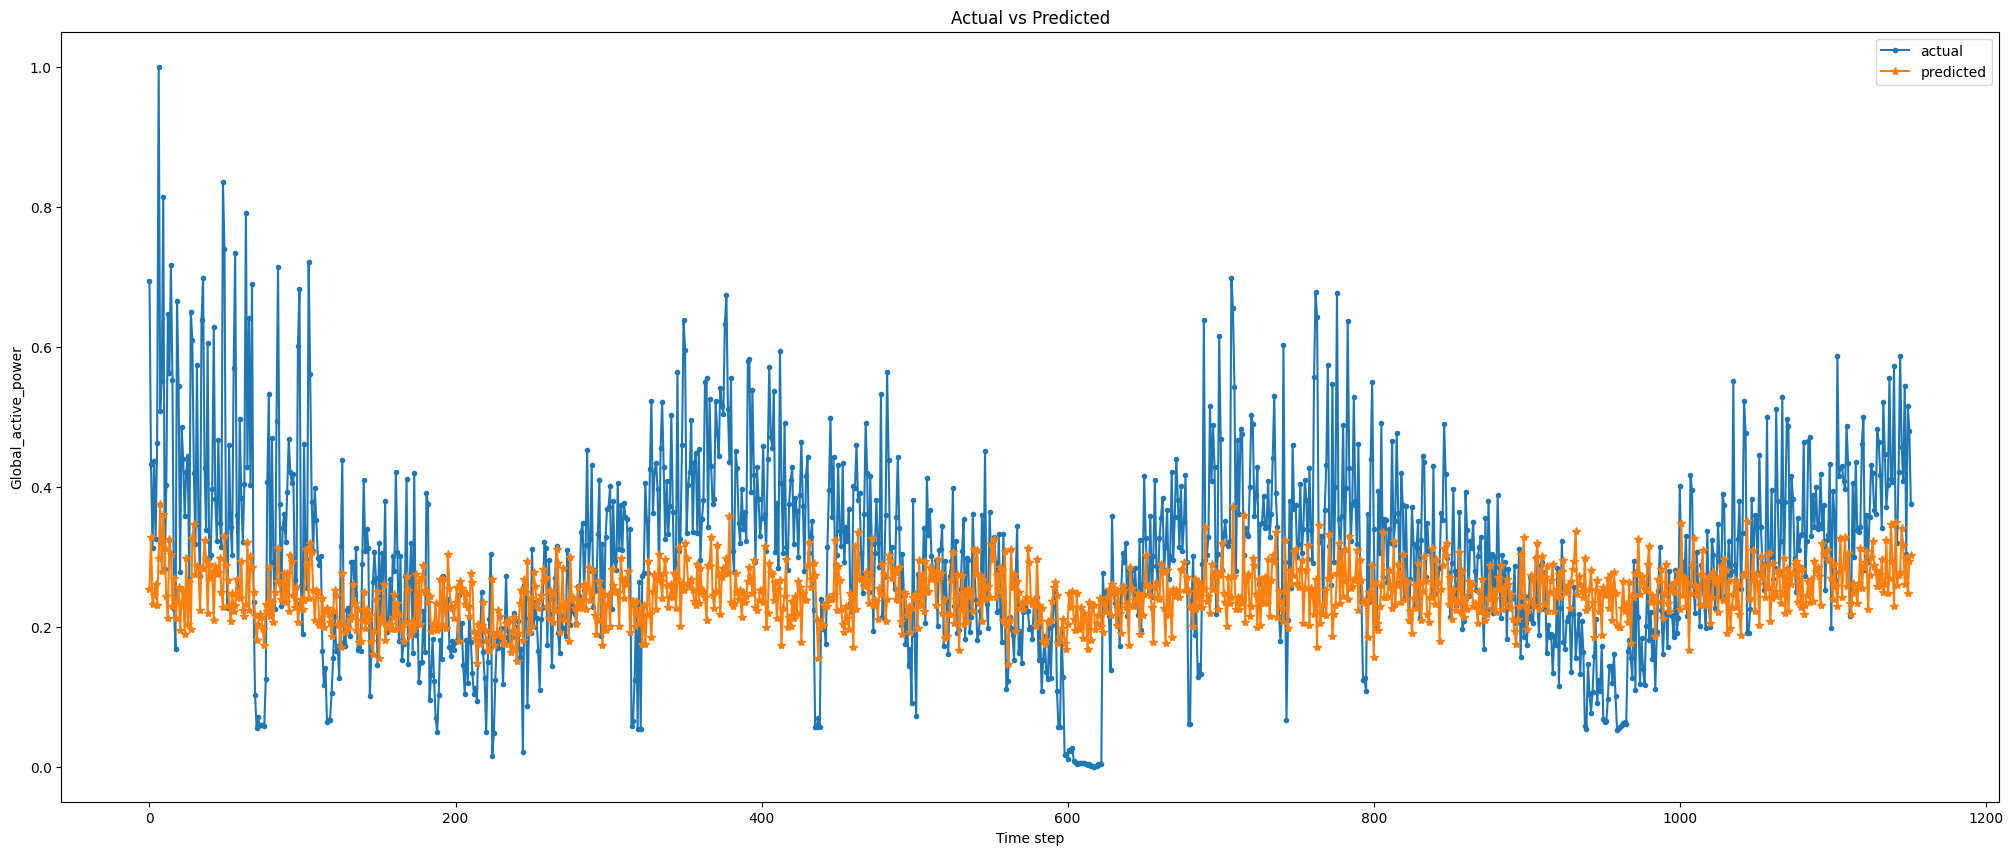

In [ ]:
plot(train_y, train_predictions)

In [ ]:
rmse_train

array([0.14237997], dtype=float32)

In [ ]:
with tf.GradientTape() as tape:
  # tape.watch(data)
  predictions = model(test_X, training=False)
  # print("Predictions", predictions)
  loss = tf.keras.losses.MSE(test_y, predictions)
  print(np.mean(loss))

0.011481061


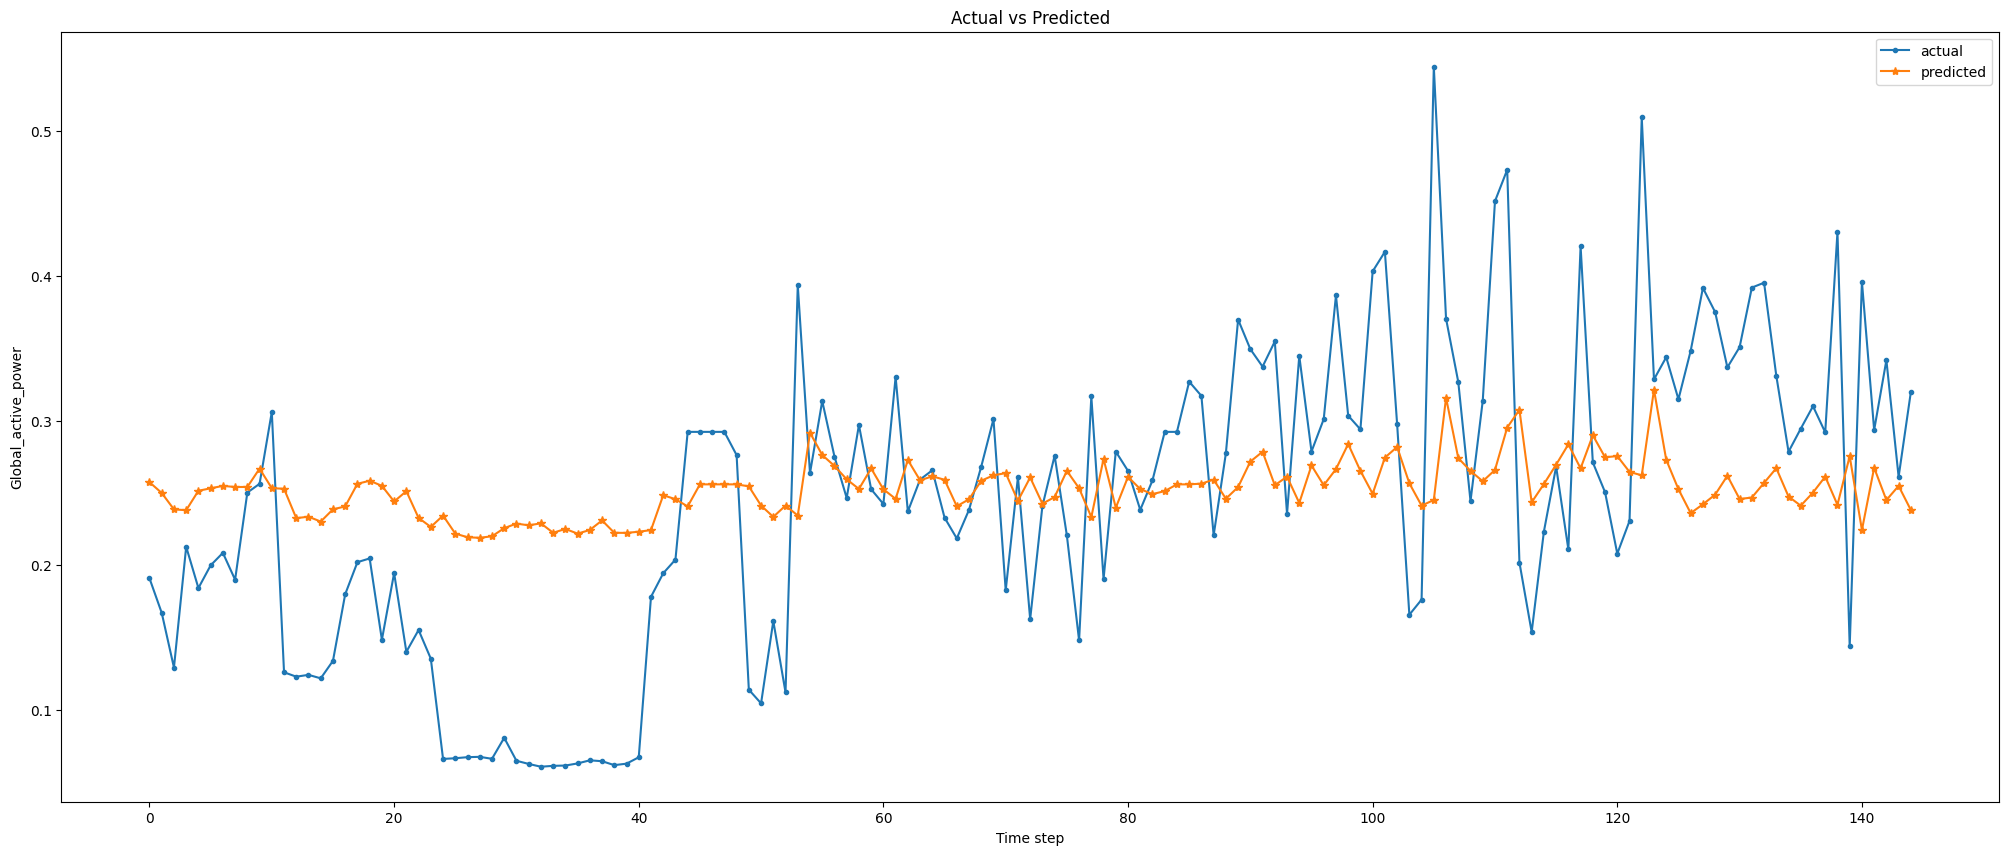

In [ ]:
plot(test_y,predictions)

In [ ]:
rmse_test = rmse_metric(test_y, predictions)

In [ ]:
rmse_test

array([0.09790319], dtype=float32)

In [ ]:
def fgsm_attack(model, epsilon, data, label):
  import numpy as np
  import tensorflow as tf
  data = tf.convert_to_tensor(data)
  with tf.GradientTape() as tape:
    tape.watch(data)
    predictions = model(data)
    print("Predictions", predictions)
    loss = tf.keras.losses.MSE(label, predictions)
  gradient = tape.gradient(loss, data)
  print(gradient.shape)
  advX = data + (epsilon * np.sign(gradient))
  return advX

In [ ]:
import tensorflow as tf
import keras
from keras.models import load_model
saved_model = load_model('3_fold_model.60-0.01.h5')
saved_model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
epsilon = [0.05, 0.1, 0.15, 0.2, 0.25]

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

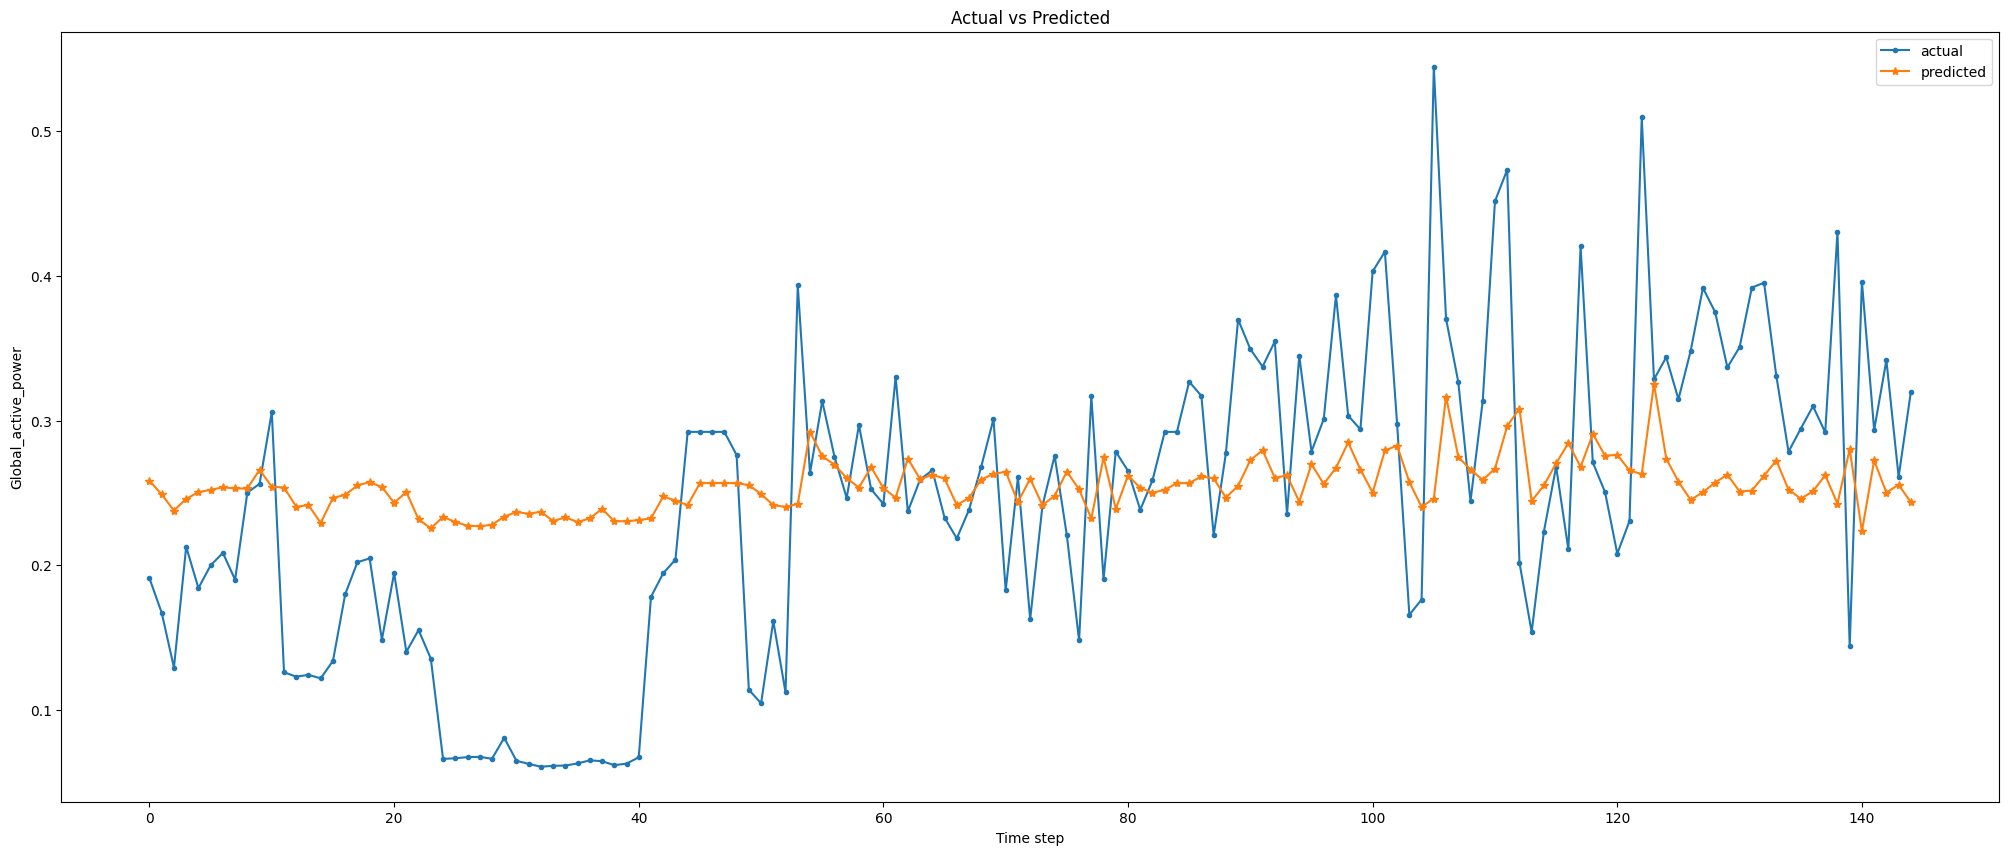

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

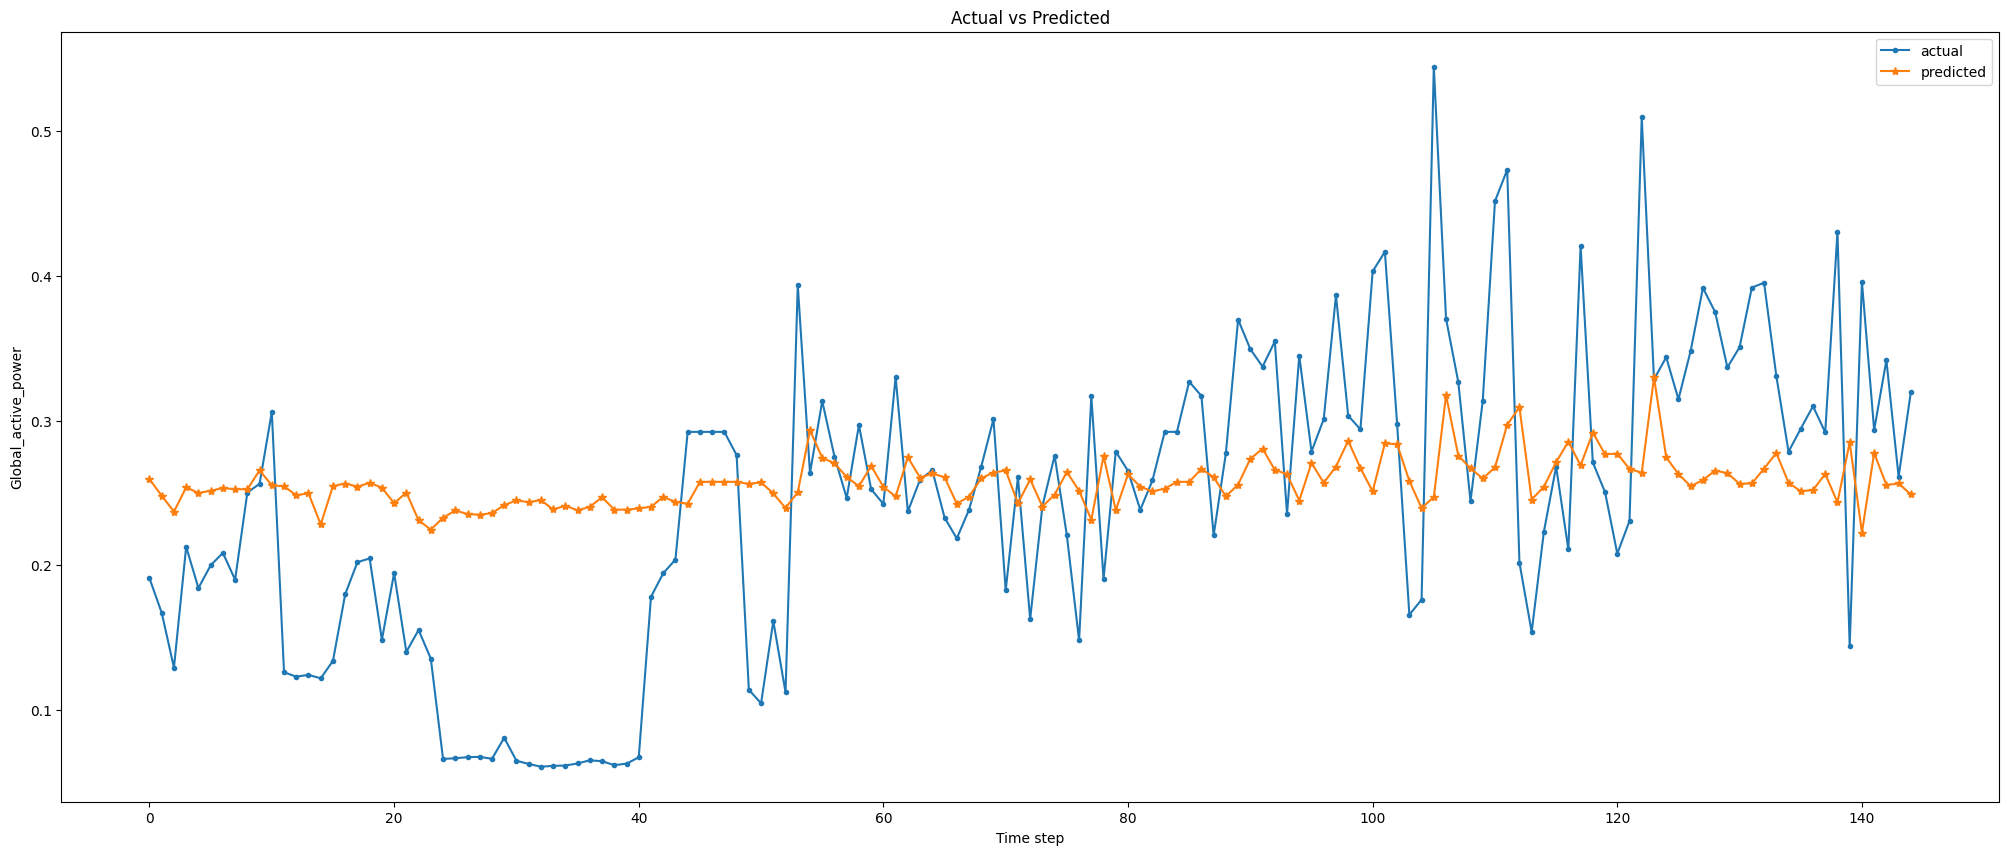

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

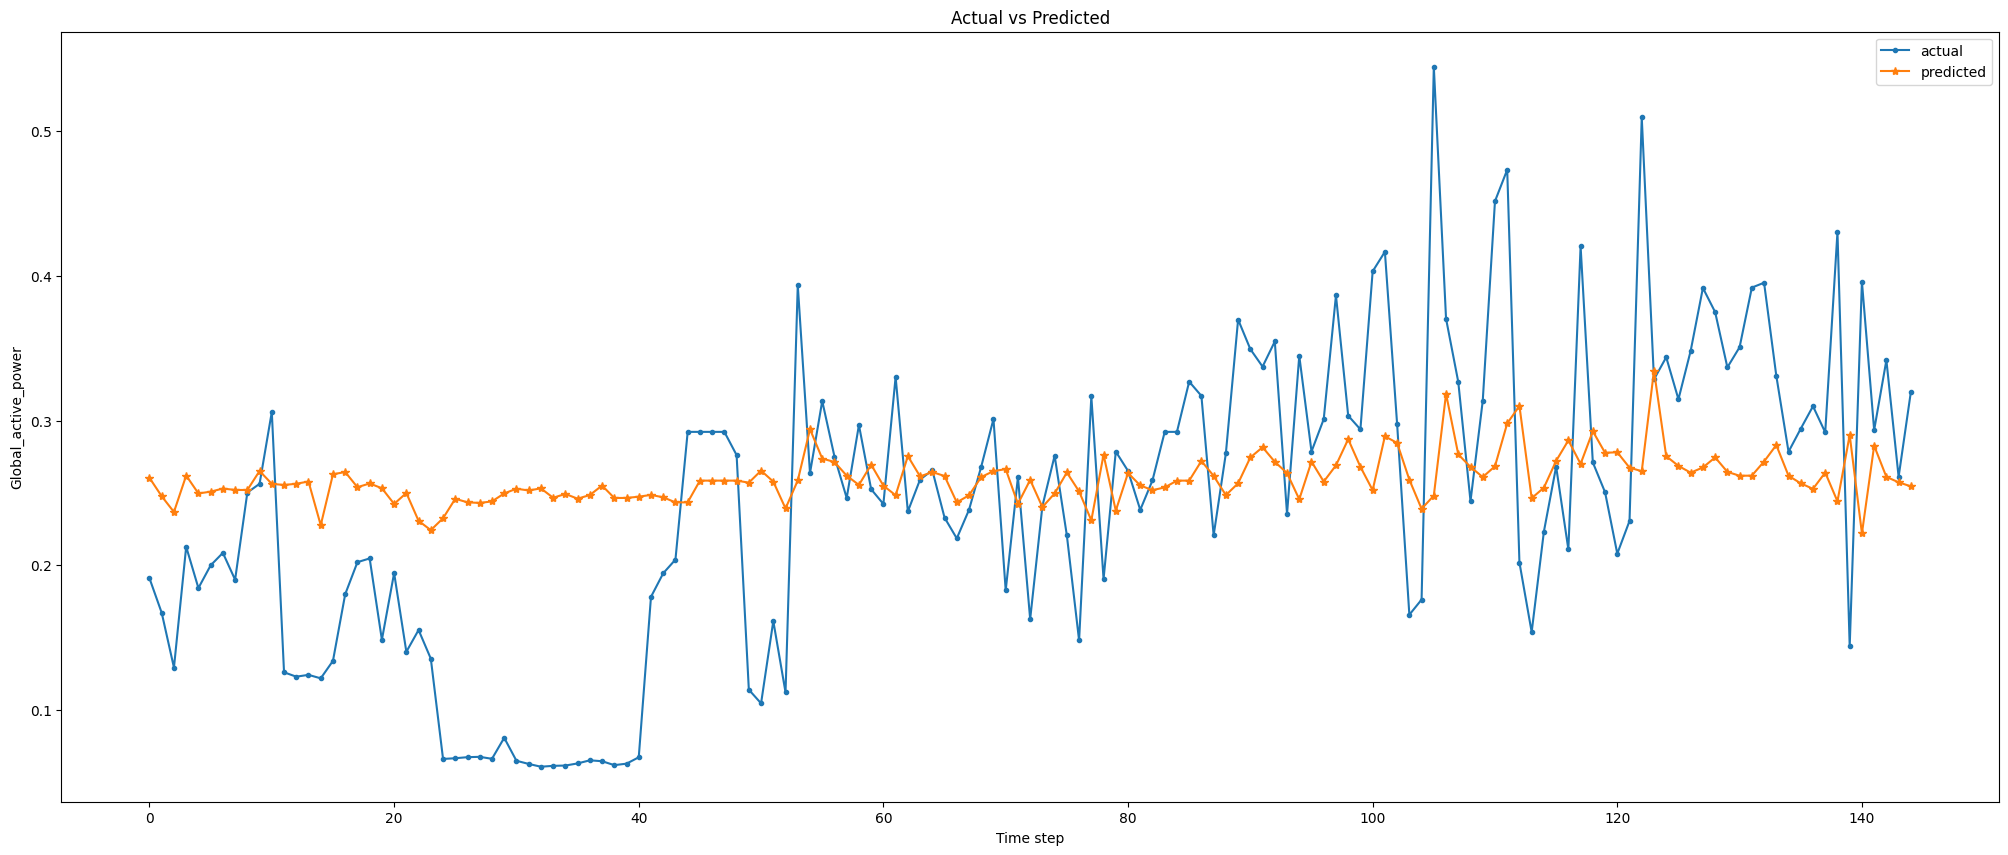

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

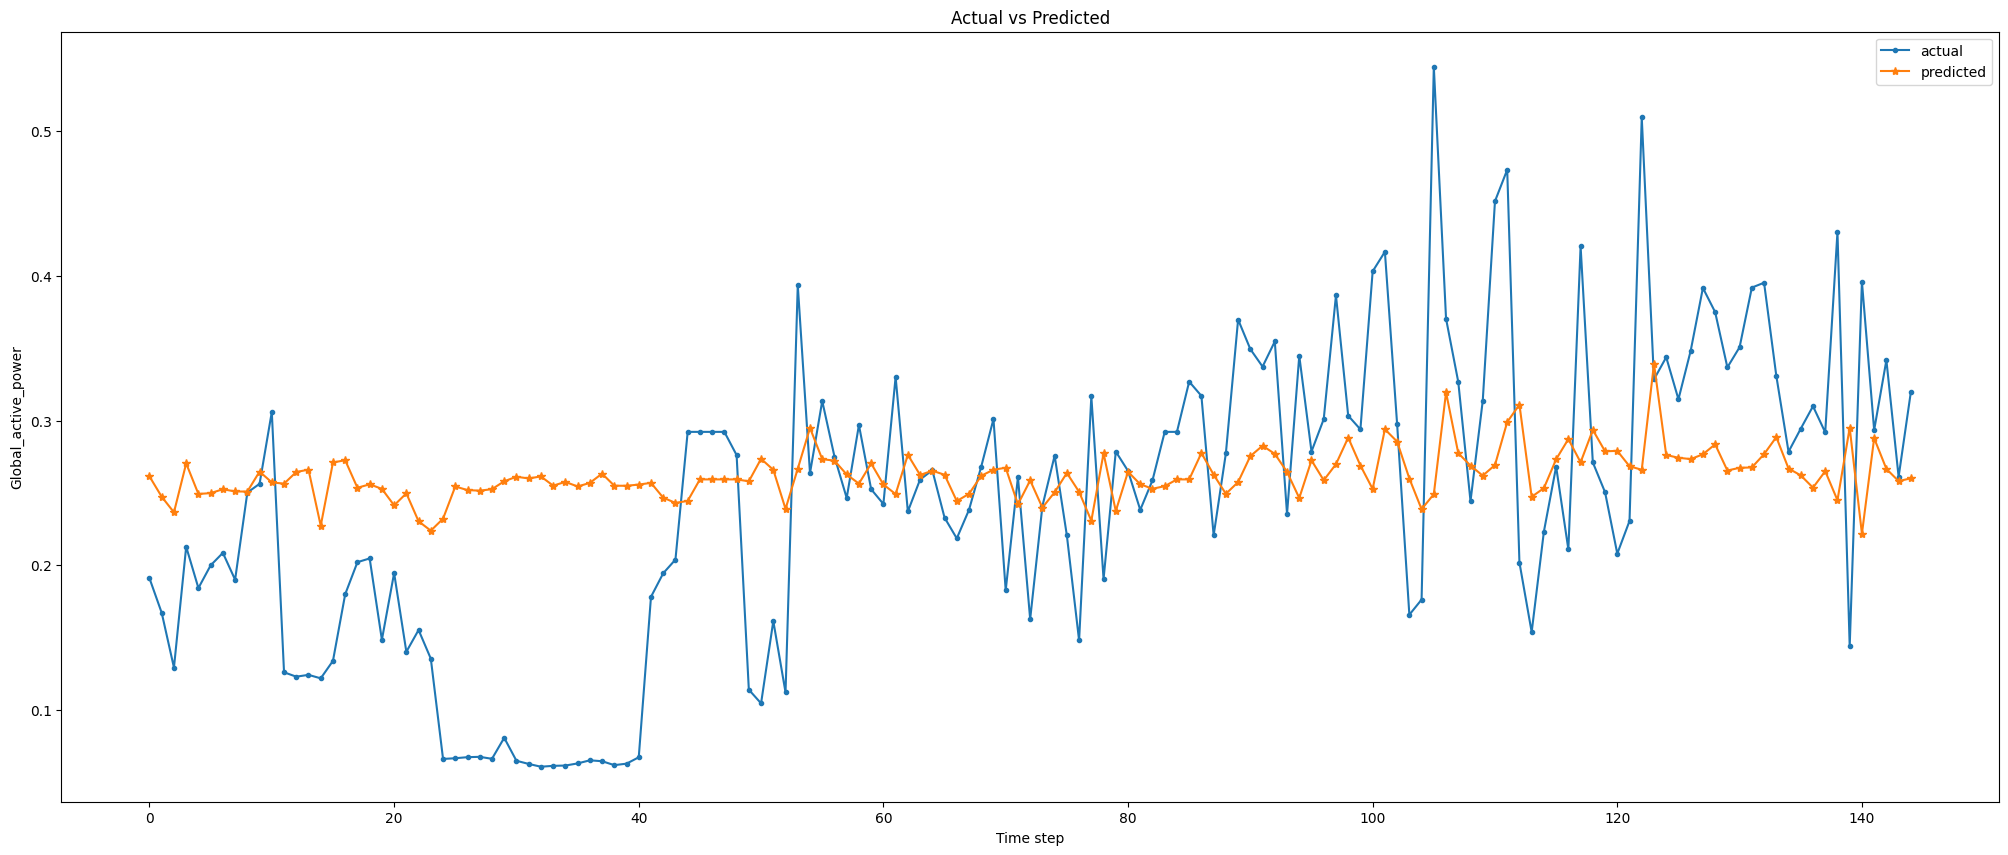

Predictions tf.Tensor(
[[0.32819372]
 [0.22322577]
 [0.19800308]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.3380953 ]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479734]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290101]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032351]
 [0.12348443]
 [0.09931314]
 [0.09831417]
 [0.10049021]
 [0.09964609]
 [0.10069905]
 [0.1004257 ]
 [0.09734672]
 [0.10123876]
 [0.10040054]
 [0.10232925]
 [0.10768333]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608524]
 [0.26504496]
 [0.2394036 ]
 [0.29861355]
 [0.2811117 ]
 [0.2779222 ]
 [0.27229682]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718

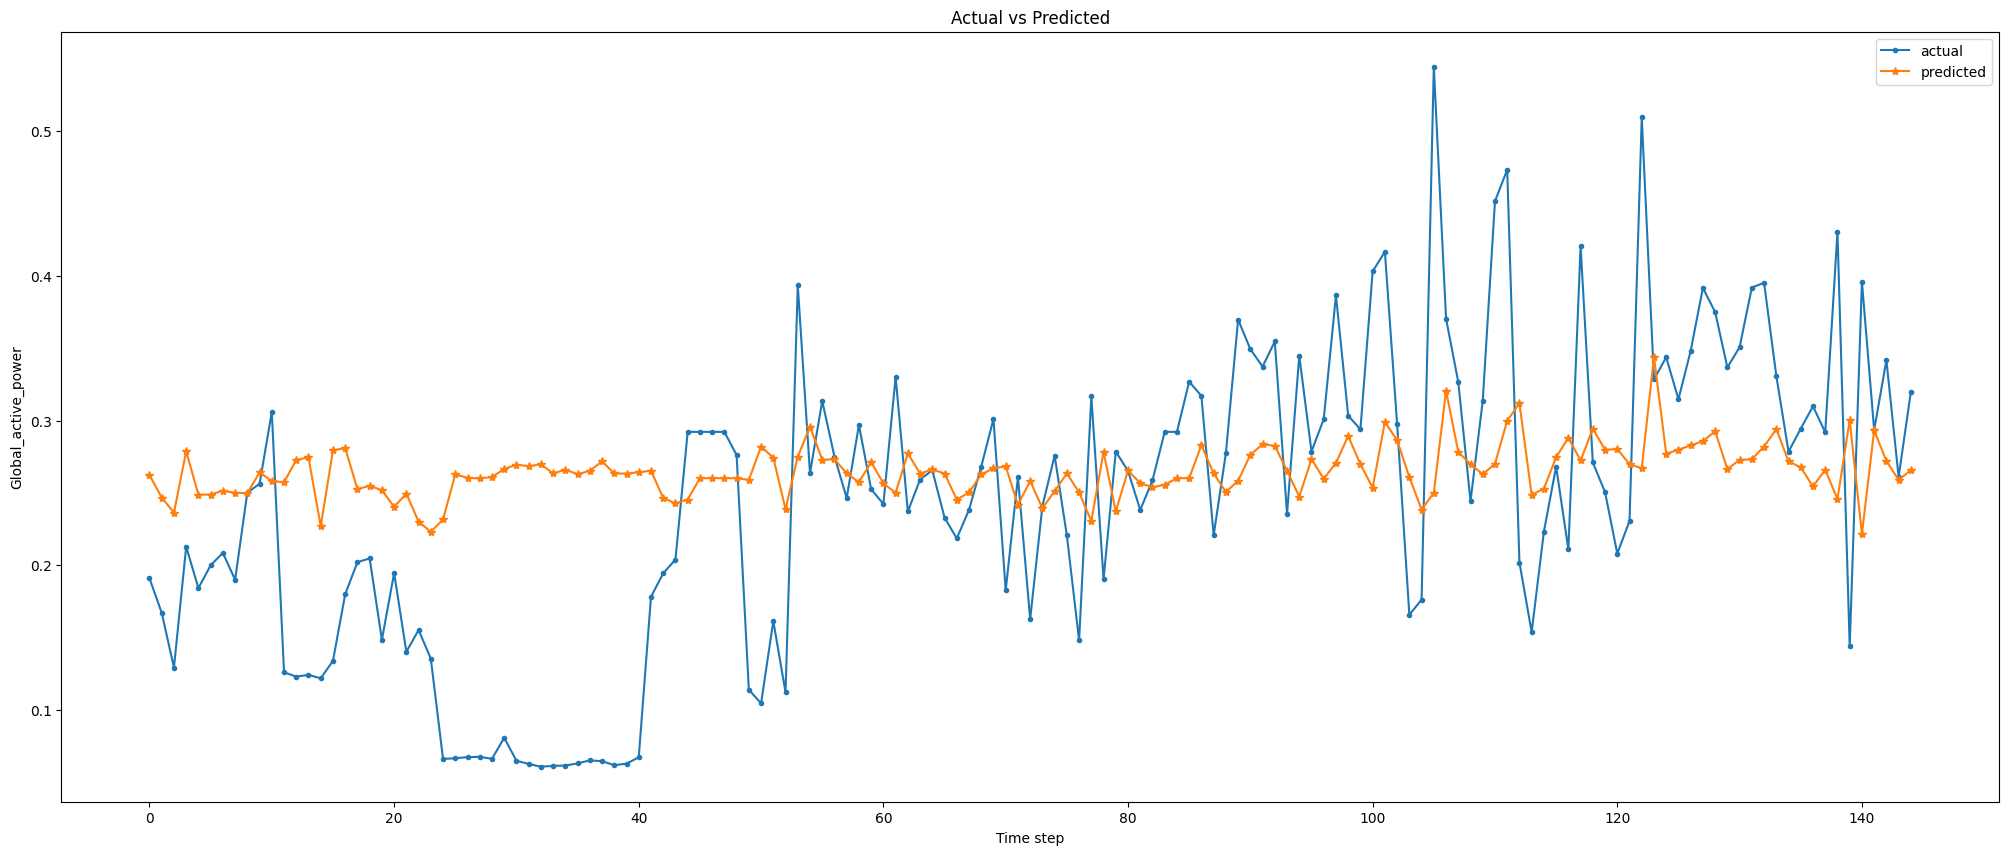

In [ ]:
advX = []
attack_prediction = []
rmse_attack = []
for i in range(len(epsilon)):
  advX.append(fgsm_attack(saved_model, epsilon[i], test_X, test_y))
  attack_prediction.append(model(advX[i],training=False))
  plot(test_y, attack_prediction[i])
  rmse_attack.append(rmse_metric(test_y, attack_prediction[i]))

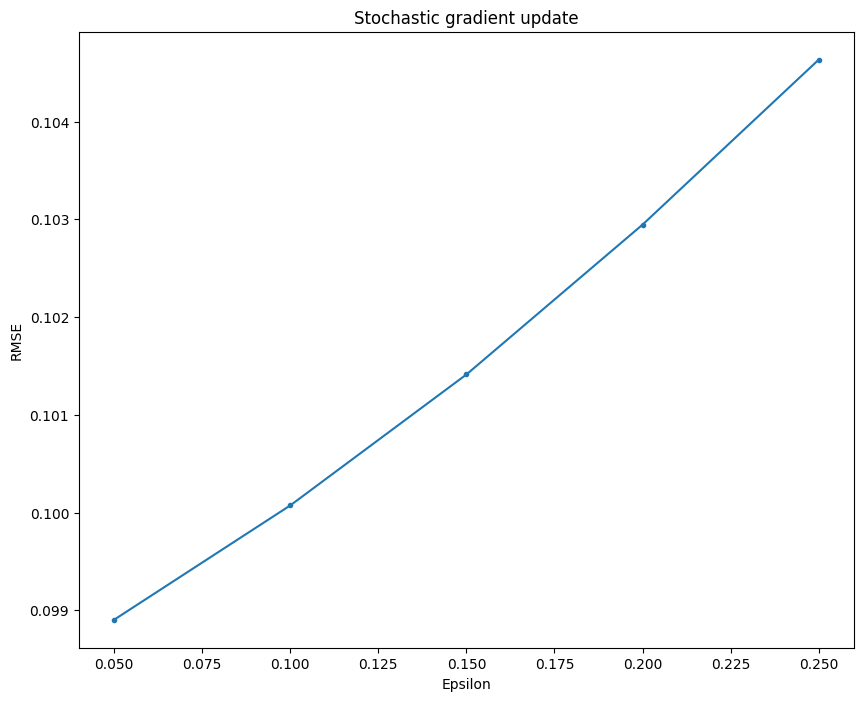

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.ylabel('RMSE')
plt.xlabel('Epsilon')
plt.title("Stochastic gradient update")
plt.plot(epsilon, rmse_attack, marker=".")
plt.show()

In [ ]:
rmse_attack

[array([0.09890434], dtype=float32),
 array([0.10007348], dtype=float32),
 array([0.10141253], dtype=float32),
 array([0.1029451], dtype=float32),
 array([0.10463213], dtype=float32)]